# 1. Perkenalan

## MILESTONE 2
```
Nama  : Shinta Amalia
Batch : RMT-032

Problem Statement:
Saya merupakan seorang data analyst di PT. ABC yang bergerak di bidang peminjaman dana. Saya diberikan data dalam format csv berjudul `loan_data.csv` yang nantinya akan dibuat model guna mempelajari pola dalam memprediksi apakah loan atau pengajuan peminjaman di approve atau tidak. Model tersebut juga akan di simpan sehingga digunakan untuk memprediksi data baru.

Objective:
File ini berisi model prediksi klasifikasi menggunakan KNN, SVM, Decision Tree, Random Forest, dan XGBooster yang nantinya akan dipilih model terbaik. Model-model tersebut dibuat menggunakan pipeline dan dilengkapi dengan cross-validation dan hyperparameter tuning.

```

# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle

Libaries berhasil di import.

# 3. Data Loading

Data yang digunakan berasal dari [kaggle](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction) yang selanjutnya disimpan dalam format csv berjudul `loan_data.csv`

In [2]:
# Load Data 
df_raw = pd.read_csv("loan_data.csv")
df = df_raw.copy()

# Menampilkan 10 data pertama
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [3]:
# Menampilkan 10 data terakhir
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
371,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
372,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
373,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
374,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
375,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Data berhasil di load dan disimpan dalam variabel `df` serta ditampilkan juga 10 data pertama dan terakhir.

## 3.1 Simple Exploriation

In [4]:
# Mengecek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Dari info data diperoleh bahwa terdapat 13 kolom dengan 381 baris yang detailnya sebagai berikut: 
| Kolom | Deskripsi | Missing Value | Tipe Data |
|-----|-----|-----|-----|
| `Loan_ID` | A unique loan ID | Tidak ada | Sesuai |
| `Gender` | Either male or female. | Ada | Sesuai |
| `Married` | Weather Married(yes) or Not Marttied(No) | Tidak ada | Sesuai |
| `Dependents` | Number of persons depending on the client | Ada | Tidak Sesuai |
| `Education` | Applicant Education(Graduate or Not Graduate) | Tidak ada | Sesuai |
| `Self_Employed` | Self-employed (Yes/No) | Ada | Sesuai |
| `ApplicantIncome` | Applicant income | Tidak Ada| Sesuai |
| `CoapplicantIncome` | Co-applicant income | Tidak ada | Sesuai |
| `LoanAmount` | Loan amount in thousands | Tidak ada | Sesuai |
| `Loan_Amount_Term` | Terms of the loan in months | Ada | Sesuai |
| `Credit_History` | Credit history meets guidelines | Ada | Sesuai |
| `Property_Area` | Applicants are living either Urban, Semi-Urban or Rural | Tidak ada | Sesuai |
| `Loan_Status` | Loan approved (Y/N) | Tidak ada | Sesuai |


In [5]:
# Cek duplikat data
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat

In [6]:
#  Cek Missing Value

df.isnull().sum()


Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Kolom yang terdapat missing value yaitu `Gender`, `Dependents`, `Self_Employed`, `Loan_Amount_Term` dan `Credit_History`. Guna menghasilkan EDA yang diinginkan, maka missing value di handling terlebih dahulu.

Setelah dilakukan analisa, missing values pada ke-4 kolom tergolong **MCAR** yaitu Missing Completely at Random (MCAR). Hal tersebut dikarenakan tidak ada hubungan dari data yang hilang pada masing-masing kolom dengan kolom lain.

Karena data yang missing atau nilainya null sebagian besar termasuk kedalam data categorical (`Gender`, `Self_Employed`, `Credit_History` ), maka data akan dilakukan drop. Karena jika data yang null dilakukan imputasi menggunakan mean dan modus maka data akan menjadi bias.

In [7]:
# Menghapus data yang nilainya Null 
df = df.dropna()

# Cek data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


Kini jumlah kolom menjadi 13 dengan 380 baris. Nilai Non-Null Count setiap kolom jumlahnya sama dengan jumlah baris sehingga missing value sudah tidak ada.

In [8]:
# Statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,308,308,LP002990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,308,2,Male,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,308,2,Yes,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,308,4,0,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,308,2,Graduate,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,308,2,No,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,308.0,NaN,NaN,NaN,3599.126623,1462.359612,150.0,2568.75,3329.5,4291.0,9703.0
CoapplicantIncome,308.0,NaN,NaN,NaN,1278.434805,2520.961308,0.0,0.0,871.5,1953.5,33837.0
LoanAmount,308.0,NaN,NaN,NaN,104.623377,29.382256,9.0,89.75,110.0,128.0,150.0
Loan_Amount_Term,308.0,NaN,NaN,NaN,341.181818,68.246006,36.0,360.0,360.0,360.0,480.0


Dalam tabel tersebut karena data types ada yang object menjadikan nilainya NaN untuk mean hingga max. 

In [9]:
# Cek Unique Data
df.nunique()

Loan_ID              308
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      267
CoapplicantIncome    153
LoanAmount            96
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Unique value tertinggi pada kolom `Loan_ID` sebesar 308.

In [10]:
# Cek nama kolom
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
# Cek Unique Value
columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for i in columns:
    uv = df[i].unique()
    print(f"Daftar unique value untuk {i} yaitu: {uv}")
    print('--'*30)

Daftar unique value untuk Loan_ID yaitu: ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001013' 'LP001024'
 'LP001029' 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043'
 'LP001047' 'LP001068' 'LP001073' 'LP001086' 'LP001095' 'LP001097'
 'LP001098' 'LP001112' 'LP001116' 'LP001119' 'LP001120' 'LP001131'
 'LP001138' 'LP001144' 'LP001146' 'LP001151' 'LP001155' 'LP001157'
 'LP001164' 'LP001179' 'LP001194' 'LP001195' 'LP001197' 'LP001199'
 'LP001205' 'LP001206' 'LP001222' 'LP001228' 'LP001238' 'LP001241'
 'LP001245' 'LP001248' 'LP001255' 'LP001259' 'LP001265' 'LP001275'
 'LP001279' 'LP001282' 'LP001316' 'LP001319' 'LP001322' 'LP001325'
 'LP001327' 'LP001333' 'LP001334' 'LP001343' 'LP001345' 'LP001367'
 'LP001384' 'LP001385' 'LP001430' 'LP001431' 'LP001432' 'LP001473'
 'LP001478' 'LP001482' 'LP001487' 'LP001489' 'LP001491' 'LP001493'
 'LP001507' 'LP001514' 'LP001518' 'LP001520' 'LP001528' 'LP001532'
 'LP001535' 'LP001560' 'LP001565' 'LP001572' 'LP001577' 'LP001578'
 'LP001579' 'LP001586

Dilihat dari unique value ada hal yang menarik yaiutu kolom `Dependents` terdapat angka 3+. Diketahui sebelumnya bahwa tipe data kolom tersebut tidak sesuai yang mana di deteksi object padahal seharusnya integer.

## 3.2 Change Data Type

Perubahan tipe data dilakukan pada kolom `Dependents`. Sebelum dilakukan perubahan tipe data tersebut, dilakukan pembersihan data terlebih dahulu.

In [12]:
# Menghapus + dalam kolom Dependents
df['Dependents'] = df['Dependents'].str.replace('+', '')

# Cetak 5 data terakhir
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Pada kolom `Dependents` tanda + berhasil dihapus. Selanjutnya dilakukan perubahan tipe data 

In [13]:
# Perubahan Tipe Data 
df['Dependents'] = df['Dependents'].astype(int)

# Cek Hasilnya 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Perubahan tipe data berhasil dilakukan.

## 3.3 Change Data in Column Target

Dilakukan perubahan data pada kolom target yaitu `Loan_Status` dikarenakan akan melakukan permodelan menggunakan XGBoost. `Loan_Status` pada data asli merupakan tipe object yaitu Y dan N sedangkan XGBoost harus tipe numerik sehingga akan dilakukan perubahan dengan Y = 1 dan N = 0. Detailnya yaitu:
1. Y = 1 (Loan di Approved)
2. N = 0 (Loan tidak di approved)

In [14]:
# Perubahan data `Loan_status`
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df.head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\2961294388.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


# 4. Exploratory Data Analysis (EDA)

## 4.1 Kolerasi antar Kolom Numerik

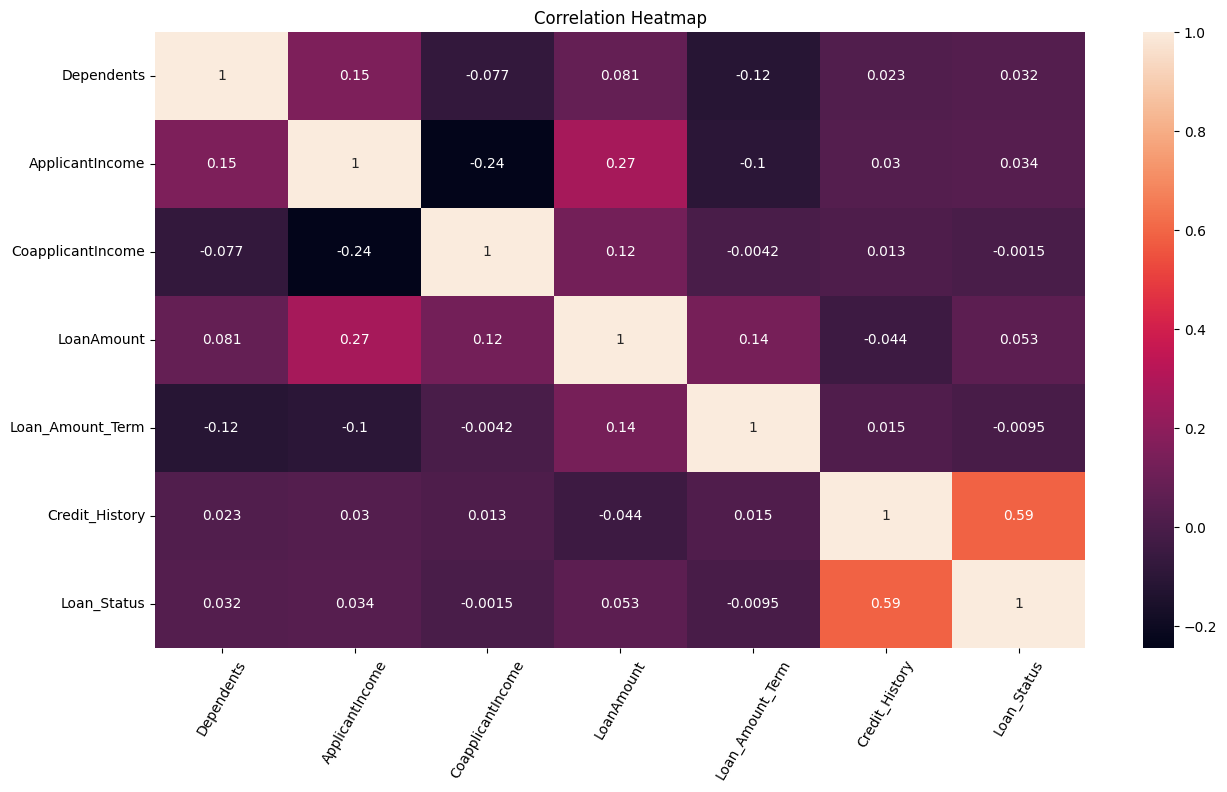

In [15]:
# Kolerasi kolom numerik
numerical_df = df.select_dtypes(include=['number']) 

plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(numerical_df.corr(), annot=True)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
heatmap.set_title('Correlation Heatmap')
plt.show()

Kolerasi antar kolom numerik sangat rendah hanya berkisar -0.077 s/d 0.27.

## 4.2 Target (`Loan_Status`)

Kita lakukan eksplorasi data pada kolom target atau kolom dependen yaitu `Loan_Status`

In [16]:
# Mengetahui jumlah loan
target = df["Loan_Status"].value_counts().reset_index()
target

,Loan_Status,count
0,1,219
1,0,89


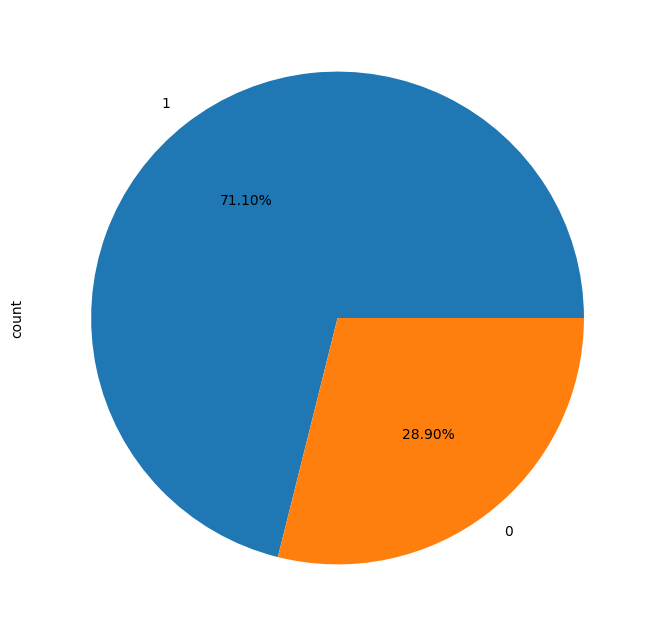

In [17]:
# Membuat Pie 
fig,ax1 = plt.subplots(figsize=(8,8))

df['Loan_Status'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan hasil perhitungan dan pie chart diperoleh bahwa **Loan_Status "Y" atau di approved lebih banyak sebesar 71.10% daripada "N" atau tidak di approved sebesar 28.90%**. Detail jumlahnya yaitu Y sebanyak 219 dan N sebanyak 89.

## 4.3 Eksplorasi Kolom Kategori

Eksplorisasi dilakukan pada kolom kategori yaitu `Gender`, `Property_Area`, dan `Education`.

### 4.3.1 Kolom Gender dengan Loan_Status

In [18]:
# Ingin tau berdasarkan gender dan loan_status 
gender_age_counts = pd.crosstab(df['Gender'], df['Loan_Status'])
gender_age_counts

Loan_Status,0,1
Gender,,
Female,23,40
Male,66,179


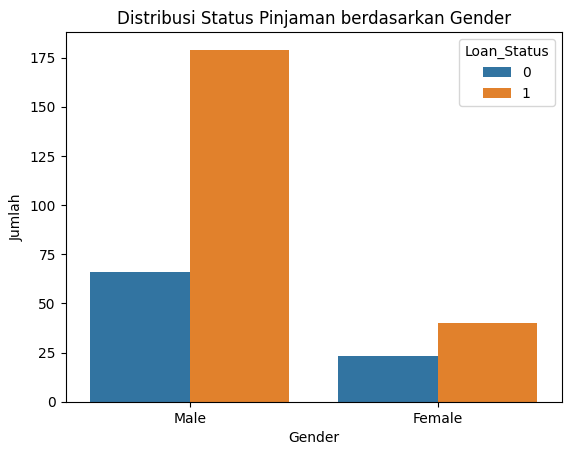

In [19]:
# Membuat bar chart
sns.countplot(x='Gender', hue='Loan_Status', data=df)

# Memberikan judul dan label sumbu
plt.title('Distribusi Status Pinjaman berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Dari bar chart diatas dapat diketahui bahwa **Loan banyak diajukan oleh Male (Laki-laki) dibandingkan Female (Perempuan)**. Kedua jenis kelamin tersebut juga menyatakan loan_status di approved (1) lebih banyak daripada tidak diapproved (0).

### 4.3.2 Kolom Property_Area dengan Loan_Status

In [20]:
# Ingin tau berdasarkan property_area dan loan_status 
property_counts = pd.crosstab(df['Property_Area'], df['Loan_Status'])
property_counts

Loan_Status,0,1
Property_Area,,
Rural,33,53
Semiurban,23,100
Urban,33,66


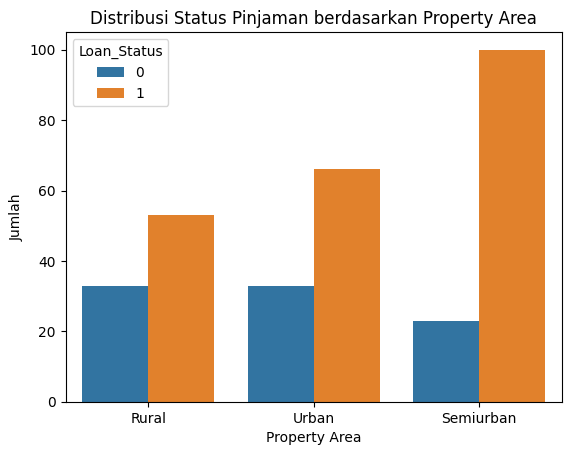

In [21]:
# Membuat bar chart
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

# Memberikan judul dan label sumbu
plt.title('Distribusi Status Pinjaman berdasarkan Property Area')
plt.xlabel('Property Area')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Berdasarkan barchart diatas diperoleh bahwa **loan banyak diajukan di area Semi Urban, diikuti dengan Urban dan Rural**. Pada ketiga area tersebut menunjukkan bahwa loan_status lebih banyak di approved (1) daripada tidak di approved (0)

### 4.3.3 Kolom Education dengan Loan_Status

In [22]:
# Ingin tau berdasarkan property_area dan loan_status 
education_counts = pd.crosstab(df['Education'], df['Loan_Status'])
education_counts

Loan_Status,0,1
Education,,
Graduate,63,166
Not Graduate,26,53


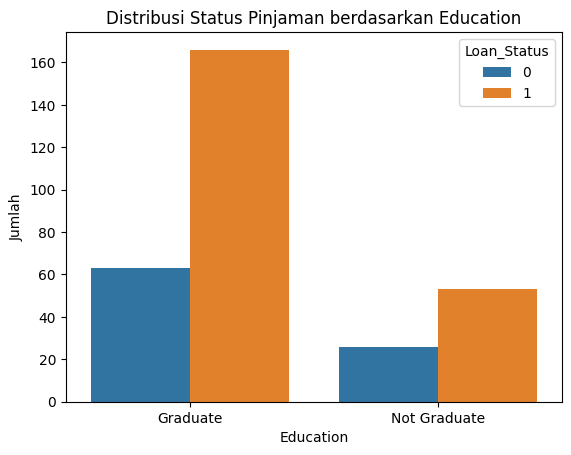

In [23]:
# Membuat bar chart
sns.countplot(x='Education', hue='Loan_Status', data=df)

# Memberikan judul dan label sumbu
plt.title('Distribusi Status Pinjaman berdasarkan Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Berdasarkan barchart diatas diperoleh bahwa **loan banyak diajukan oleh pengaju dengan edukasi Graduate (sudah lulus)**. Pada kedua edukasi yaitu Graduate dan Not Graduate menunjukkan bahwa loan_status lebih banyak di approved (1) daripada tidak di approved (0).

## 4.4 Eksplorasi Kolom Numerik

### 4.4.1 Kolom ApplicantIncome 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\3417972223.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18)


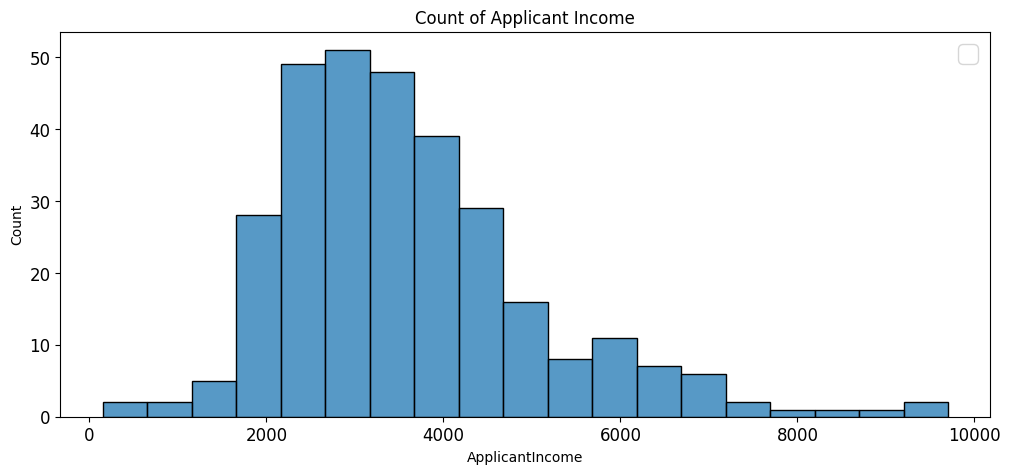

In [24]:
# Membuat grafik
plt.figure(figsize=(12,5))


sns.histplot(df["ApplicantIncome"])
plt.title("Count of Applicant Income")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=18)

In [25]:
# Mengetahui nilai max, min, mean dari ApplicantIncome
print("Nilai maksimum dari ApplicantIncome adalah : ",df["ApplicantIncome"].max())
print("Nilai minimum dari ApplicantIncome adalah : ",df["ApplicantIncome"].min())
print("Nilai rata-rata dari ApplicantIncome adalah : ",df["ApplicantIncome"].mean())

Nilai maksimum dari ApplicantIncome adalah :  9703
Nilai minimum dari ApplicantIncome adalah :  150
Nilai rata-rata dari ApplicantIncome adalah :  3599.1266233766232


Dari grafik dan perhitungan dapat diketahui bahwa **nilai minimum dari Applicant Income sebesar 150 ribu US Dollar, maksimumnya sebesar 9730 ribu US Dollar dengan rata-rata sebesar 3599.13 ribu US Dollar**.

In [26]:
# Membagi ApplicantIncome berdasarkan Loan_Status
approved = df[df["Loan_Status"] == 1]["ApplicantIncome"].reset_index()
no_approved = df[df["Loan_Status"] == 0]["ApplicantIncome"].reset_index()

# Cetak Hasil
print("Nilai maksimum dari Applicant Income yang di approve adalah : ",approved["ApplicantIncome"].max())
print("Nilai minimum dari Applicant Income yang di approve adalah : ",approved["ApplicantIncome"].min())
print("Nilai rata-rata dari Applicant Income yang di approve adalah : ",approved["ApplicantIncome"].mean())
print("---"*35)
print("Nilai maksimum dari Applicant Income yang tidak di approve adalah : ",no_approved["ApplicantIncome"].max())
print("Nilai minimum dari Applicant Income yang tidak di approve adalah : ",no_approved["ApplicantIncome"].min())
print("Nilai rata-rata dari Applicant Income yang tidak di approve adalah : ",no_approved["ApplicantIncome"].mean())

Nilai maksimum dari Applicant Income yang di approve adalah :  9703
Nilai minimum dari Applicant Income yang di approve adalah :  645
Nilai rata-rata dari Applicant Income yang di approve adalah :  3630.703196347032
---------------------------------------------------------------------------------------------------------
Nilai maksimum dari Applicant Income yang tidak di approve adalah :  7660
Nilai minimum dari Applicant Income yang tidak di approve adalah :  150
Nilai rata-rata dari Applicant Income yang tidak di approve adalah :  3521.4269662921347


Berdasarkan dari perhitungan diatas diperoleh bahwa **selisih nilai minimum dan maksimum dari applicant income yang diapproved dengan tidak di approved cukup jauh, namun rata-rata dari kedua nya tidak berbeda secara signifikan.**

### 4.4.2 Kolom LoanAmount 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\1147490349.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18)


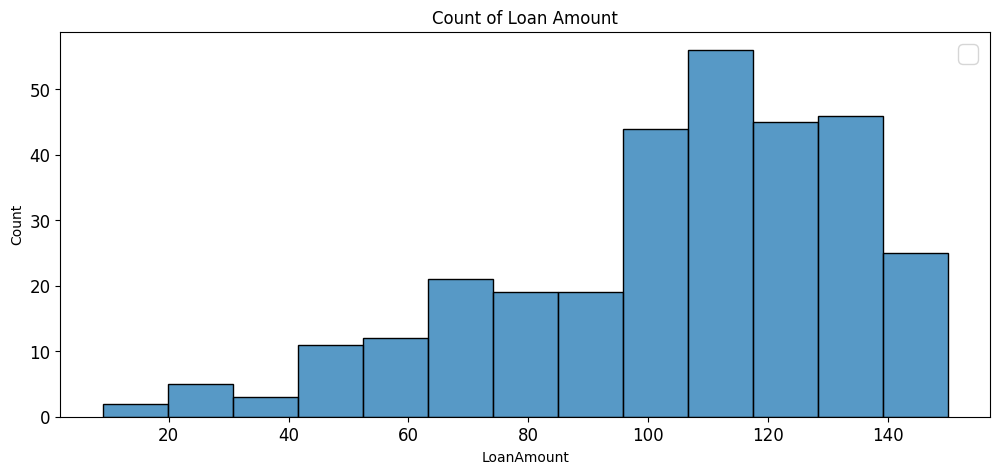

In [27]:
# Grafik
plt.figure(figsize=(12,5))

sns.histplot(df["LoanAmount"])
plt.title("Count of Loan Amount")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=18)

In [28]:
# Mengetahui nilai min, max, dan mean dari LoanAmount
print("Nilai maksimum dari LoanAmount adalah : ",df["LoanAmount"].max())
print("Nilai minimum dari LoanAmount adalah : ",df["LoanAmount"].min())
print("Nilai rata-rata dari LoanAmount adalah : ",df["LoanAmount"].mean())

Nilai maksimum dari LoanAmount adalah :  150.0
Nilai minimum dari LoanAmount adalah :  9.0
Nilai rata-rata dari LoanAmount adalah :  104.62337662337663


Dari grafik dan perhitungan dapat diketahui bahwa **nilai minimum dari Loan Amount sebesar 9 ribu US Dollar, maksimumnya sebesar 150 ribu US Dollar dengan rata-rata sebesar 104.623 ribu US Dollar**.

In [29]:
# Membagi LoanAmount berdasarkan Loan_Amount
approved_la = df[df["Loan_Status"] == 1]["LoanAmount"].reset_index()
no_approved_la = df[df["Loan_Status"] == 0]["LoanAmount"].reset_index()

# Cetak Hasil
print("Nilai maksimum dari Loan Amount yang di approve adalah : ",approved_la["LoanAmount"].max())
print("Nilai minimum dari Loan Amount yang di approve adalah : ",approved_la["LoanAmount"].min())
print("Nilai rata-rata dari Loan Amount yang di approve adalah : ",approved_la["LoanAmount"].mean())
print("---"*35)
print("Nilai maksimum dari Loan Amount yang tidak di approve adalah : ",no_approved_la["LoanAmount"].max())
print("Nilai minimum dari Loan Amount yang tidak di approve adalah : ",no_approved_la["LoanAmount"].min())
print("Nilai rata-rata dari Loan Amount yang tidak di approve adalah : ",no_approved_la["LoanAmount"].mean())

Nilai maksimum dari Loan Amount yang di approve adalah :  150.0
Nilai minimum dari Loan Amount yang di approve adalah :  17.0
Nilai rata-rata dari Loan Amount yang di approve adalah :  105.61643835616438
---------------------------------------------------------------------------------------------------------
Nilai maksimum dari Loan Amount yang tidak di approve adalah :  150.0
Nilai minimum dari Loan Amount yang tidak di approve adalah :  9.0
Nilai rata-rata dari Loan Amount yang tidak di approve adalah :  102.17977528089888


Berdasarkan dari perhitungan diatas diperoleh bahwa **selisih nilai minimum dari loan amoount yang diapproved dengan tidak di approved cukup jauh. Namun nilai maksimum keduanya justru sama dan nilai rata-ratanya tidak berbeda secara signifikan.**

### 4.4.2 Kolom Loan_Amount_Term dengan Loan_Status

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\512893210.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18)


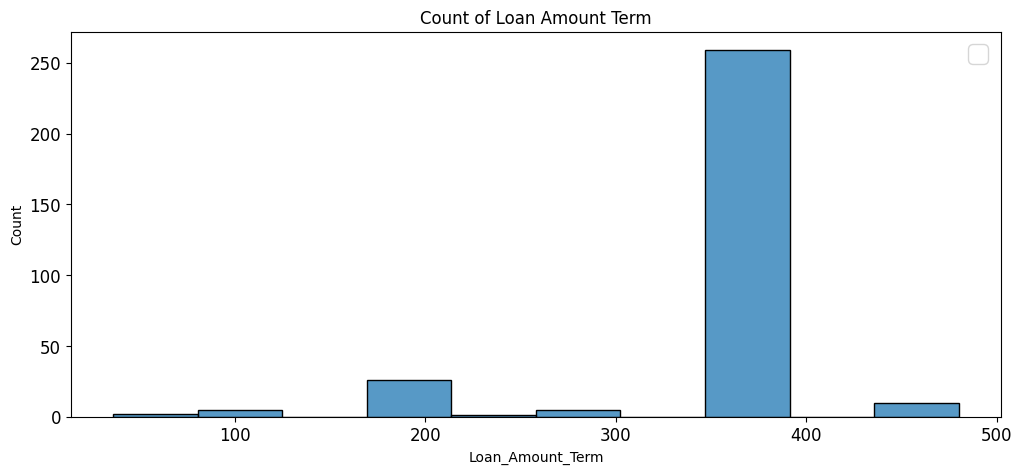

In [30]:
# Grafik
plt.figure(figsize=(12,5))

sns.histplot(df["Loan_Amount_Term"])
plt.title("Count of Loan Amount Term")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=18)

In [31]:
# Mengetahui nilai min, max, dan mean dari Loan_Amount_Term
print("Nilai maksimum dari Loan_Amount_Term adalah : ",df["Loan_Amount_Term"].max())
print("Nilai minimum dari Loan_Amount_Term adalah : ",df["Loan_Amount_Term"].min())
print("Nilai rata-rata dari Loan_Amount_Term adalah : ",df["Loan_Amount_Term"].mean())

Nilai maksimum dari Loan_Amount_Term adalah :  480.0
Nilai minimum dari Loan_Amount_Term adalah :  36.0
Nilai rata-rata dari Loan_Amount_Term adalah :  341.1818181818182


Dari grafik dan perhitungan dapat diketahui bahwa **nilai minimum dari Loan Amount Term sebesar 36 bulan (3 tahun), maksimumnya sebesar 480 bulan (40 tahun) dengan rata-rata sebesar 341 tahun (+- 28 tahun)**.

In [32]:
# Membagi Loan_Amount_Term berdasarkan Loan_Status
approved_lat = df[df["Loan_Status"] == 1]["Loan_Amount_Term"].reset_index()
no_approved_lat = df[df["Loan_Status"] == 0]["Loan_Amount_Term"].reset_index()

# Cetak Hasil
print("Nilai maksimum dari Loan Amount Term yang di approve adalah : ",approved_lat["Loan_Amount_Term"].max())
print("Nilai minimum dari Loan Amount Term yang di approve adalah : ",approved_lat["Loan_Amount_Term"].min())
print("Nilai rata-rata dari Loan Amount Term yang di approve adalah : ",approved_lat["Loan_Amount_Term"].mean())
print("---"*35)
print("Nilai maksimum dari Loan Amount Term yang tidak di approve adalah : ",no_approved_lat["Loan_Amount_Term"].max())
print("Nilai minimum dari Loan Amount Term yang tidak di approve adalah : ",no_approved_lat["Loan_Amount_Term"].min())
print("Nilai rata-rata dari Loan Amount Term yang tidak di approve adalah : ",no_approved_lat["Loan_Amount_Term"].mean())

Nilai maksimum dari Loan Amount Term yang di approve adalah :  480.0
Nilai minimum dari Loan Amount Term yang di approve adalah :  60.0
Nilai rata-rata dari Loan Amount Term yang di approve adalah :  340.7671232876712
---------------------------------------------------------------------------------------------------------
Nilai maksimum dari Loan Amount Term yang tidak di approve adalah :  480.0
Nilai minimum dari Loan Amount Term yang tidak di approve adalah :  36.0
Nilai rata-rata dari Loan Amount Term yang tidak di approve adalah :  342.2022471910112


Berdasarkan dari perhitungan diatas diperoleh bahwa **selisih nilai minimum dari loan amoount term yang diapproved dengan tidak di approved cukup jauh. Namun nilai maksimum keduanya justru sama dan nilai rata-ratanya tidak berbeda secara signifikan.**

# 5. Feature Engineering

## 5.1 Feature Selection

Sesuai dengan unique value tertinggi yaitu ada pada kolom `Loan_ID` maka akan dihapus kolom tersebut. Penghapusan dilakukan karena kolom tersebut tidak mempunyai hubungan dengan kolom lain, kolerasi yang dihasilkan tergolong kecil.

In [33]:
# Hapus kolom Loan_ID
df_1 = df.drop(columns="Loan_ID")

# Cetak 5 data awal
df_1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


Kolom Loan ID berhasil dihapus dan disimpan dalam variabel `df_1`. Pembagian jenis data pada kolom juga dilakukan yaitu: 
- Data Target : `Loan_Status`
- Data Numeric : `'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'`
- Data Categorical Nominal : `'Gender','Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'`
- Data Categorical Ordinal : `'Dependents'`

In [34]:
# Pembagian Kolom
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] # Numeric
cat_col_n = ['Gender','Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'] # Nominal
cat_col_o = ['Dependents'] # Ordinal

Pembagian kolom berhasil dilakukan.

## 5.2 Split Feature (X) dan target (y)

Dilakukan split featur (X) dan target (y) yang mana kolom `Loan_Status` merupakan target.

In [35]:
# Split data 
X = df_1.drop('Loan_Status', axis=1)
y = df_1['Loan_Status']

split berhasil

In [36]:
# Cek
print("fitur:", X.shape)
print("target:",y.shape)

fitur: (308, 11)
target: (308,)


Jumlah baris pada fitur dan target sama.

## 5.3 Split train and test set

In [37]:
# Split pada train dan test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state=42)

split train dan test berhasil

## 5.4 Handling Missing Value

In [38]:
# Cek missing value
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [39]:
# Cek missing value
y_train.isnull().sum()

np.int64(0)

Tidak ada missing value pada variabel X dan y mengingat missing value sudah dihandling sebelumnya pada bagian data loading agar memaksimalkan hasil EDA.

## 5.5 Handling Outlier

In [40]:
# Membuat diagram
def diagnostic_plots(df_2, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_2[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_2[variable])
    plt.title('Boxplot')

    plt.show()

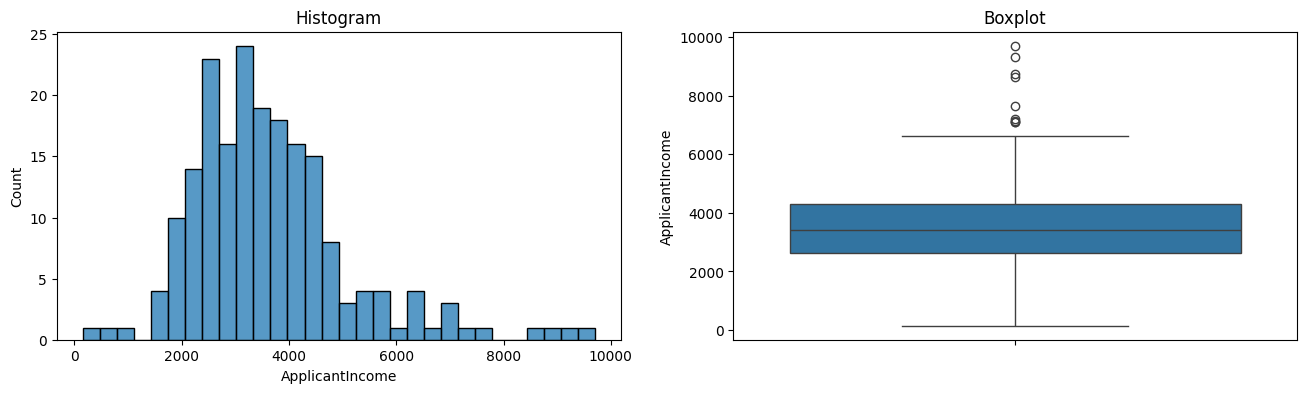

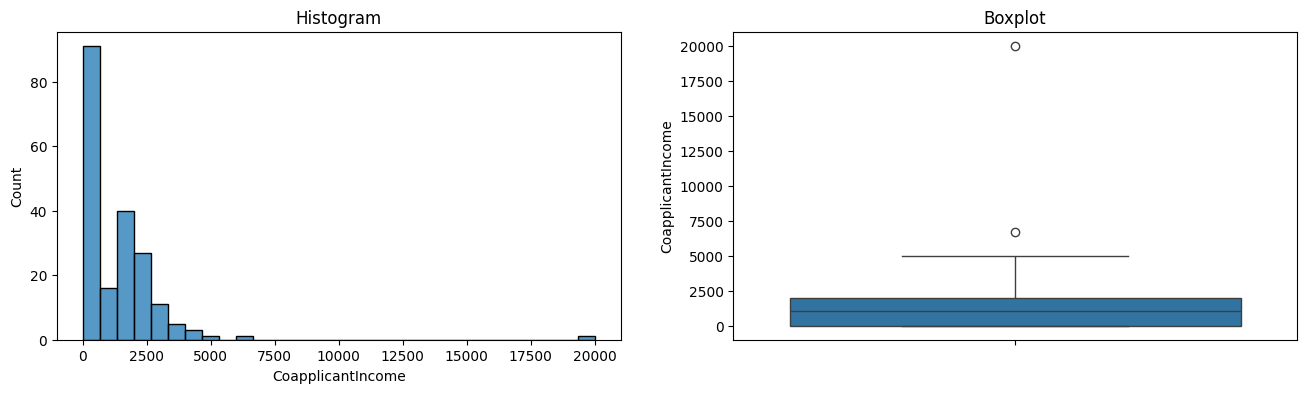

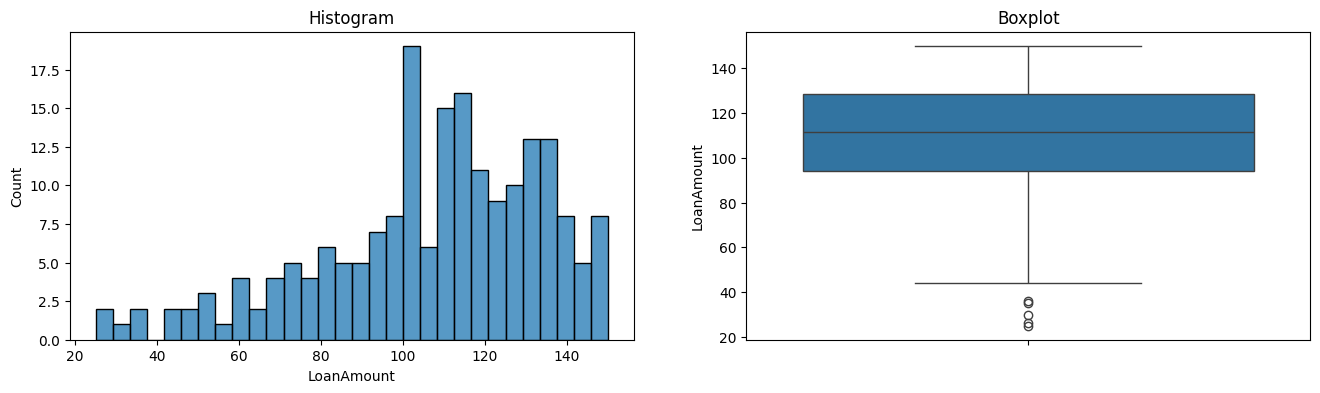

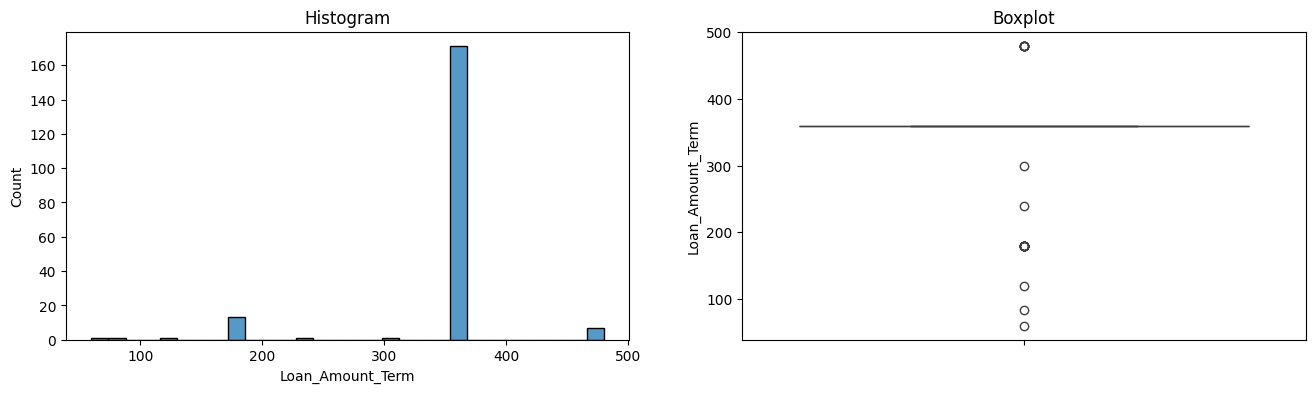

In [41]:
for i in num_col:
    diagnostic_plots(X_train, (i))

In [42]:
# Cek Skewness
for i in num_col:
    print(f'Distribution of column {i}: ', X_train[i].skew())

Distribution of column ApplicantIncome:  1.3025399488111276
Distribution of column CoapplicantIncome:  5.678497040071983
Distribution of column LoanAmount:  -0.7819943943643368
Distribution of column Loan_Amount_Term:  -2.2334428105600583


Berdasarkan boxplot menunjukkan bahwa semua kolom numerik memiliki outliers dengan detail skewness sebagai berikut:
1. Kolom `ApplicantIncome`, `CoapplicantIncome`, `Loan_Amount_Term` skew yang dihasilkan > -1 dan > 1 menandakan bahwa tergolong highly skewed.
2. Kolom `LoanAmount` skew yang dihasilkan -1 < x > - 0.5 menandakan bahwa moderately skewed.

Untuk kolom `Loan_Amount_Term` tidak dilakukan handling outlier merupakan natural outlier selain kolom tersebut maka dilakukan pengecekan persentase outlier.

In [43]:
# Menyimpan kolom 
outliers_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [44]:
# Mengetahui persentase outliers dengan IQR
def detect_skew(X_train, outliers_col, fold=1.5):

    for i in outliers_col:

        IQR = X_train[outliers_col].quantile(0.75) - X_train[outliers_col].quantile(0.25)
        upper = X_train[outliers_col].quantile(0.75) + (fold*IQR)
        bottom = X_train[outliers_col].quantile(0.25) - (fold*IQR)

        upper_count = X_train[
            (X_train[outliers_col] > upper)
        ][outliers_col].count()

        bottom_count = X_train[
            (X_train[outliers_col] < bottom)
        ][outliers_col].count()

        total_count = upper_count + bottom_count
        percentage = (total_count/len(X_train[outliers_col])*100).round(2)

        a = ({'Column': outliers_col, 'Total Outliers': total_count,
             'Percentage': percentage})
    return print(a)

for i in outliers_col:
    detect_skew(X_train, outliers_col=i)

{'Column': 'ApplicantIncome', 'Total Outliers': np.int64(9), 'Percentage': np.float64(4.59)}
{'Column': 'CoapplicantIncome', 'Total Outliers': np.int64(2), 'Percentage': np.float64(1.02)}
{'Column': 'LoanAmount', 'Total Outliers': np.int64(5), 'Percentage': np.float64(2.55)}


Dapat diketahui bahwa persentase outlier pada ketiga kolom tersebut < 5% sehingga saya tidak dilakukan hadling baik capping ataupun trimming karena masih berada dalam batas normal.

## 5.6 - Split Categorical and Numerical

Split sudah dilakukan sebelumnya pada feature selection, namun bisa di cek kembali

In [45]:
# Kolom Numerik
num_col 

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [46]:
# Kolom Kategori Nominal
cat_col_n

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [47]:
# Kolom Kategori Ordinal
cat_col_o

['Dependents']

Ketiga kolom sudah sesuai.

In [48]:
# Split 
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat_col_n = X_train[cat_col_n]
X_test_cat_col_n = X_test[cat_col_n]

X_train_cat_col_o = X_train[cat_col_o]
X_test_cat_col_o = X_test[cat_col_o]

Berhasil di split sesuai jenisnya.

In [49]:
# Cek
X_train_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
274,2717,0.0,60.0,180.0
122,3917,0.0,124.0,360.0
220,5500,0.0,105.0,360.0
270,2666,4300.0,121.0,360.0
380,4583,0.0,133.0,360.0
...,...,...,...,...
194,3762,1666.0,135.0,360.0
68,4188,0.0,115.0,180.0
91,1538,1425.0,30.0,360.0
258,4547,0.0,115.0,360.0


X_train_num sudah sesuai.

## 5.7 Feature Scaling

Scaling data yang ada pada kolom numeric agar model tidak bias pada kolom yang memiliki jumlah data yang besar. Berdasarkan pengecekan skewness, semoga kolom numerik tergolong skew sehingga scaling menggunakan **MinMaxScaler**. Scaler dilakukan pada `X_train_num`.

In [50]:
# Scalling
scaler = MinMaxScaler()
scaler.fit(X_train_num) 

MinMaxScaler()

In [51]:
# Simpan scaler di variabel 
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [52]:
# Cetak sebelum di scaler
X_train_num.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
274,2717,0.0,60.0,180.0


In [53]:
# Cek setelah di scaler
X_train_num_scaled[0]

array([0.2687114 , 0.        , 0.28      , 0.28571429])

Scaler dengan MinMaxSclaer berhasil dilakukan pada X_Train_num dan kini disimpan dalam variabel `X_train_num_scaled`.

## 5.8 Feature Encoding

### 5.8.1 Nominal

In [54]:
# Mengecek kolom nominal
X_train_cat_col_n.head(1)

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
274,Male,No,Not Graduate,No,1.0,Urban


Feature encoding pada kolom kategori nominal menggunakan **OneHotEncoder**.

In [55]:
# Metode Encoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat_col_n)

OneHotEncoder(handle_unknown='ignore')

In [56]:
# Disimpan dalam variabel 
X_train_encoded_n = encoder.transform(X_train_cat_col_n).toarray()
X_test_encoded_n = encoder.transform(X_test_cat_col_n).toarray()

In [57]:
# Cek
X_train_encoded_n[0]

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.])

Feature encoding pada kolom kategori nominal berhasil dilakukan.

### 5.8.2 Ordinal

In [58]:
# Cek kolom ordinal
X_train_cat_col_o

,Dependents
274,0
122,2
220,0
270,0
380,0
...,...
194,0
68,0
91,1
258,0


Feature encoding pada kolom kategori ordinal menggunakan **OriginalEncoder** guna mengurutkan dari tingkatan paling kecil ke paling besar.

In [59]:
# Metode Encoder 
encoder_o = OrdinalEncoder(categories=[[0, 1, 2, 3]])
encoder_o.fit(X_train_cat_col_o)

OrdinalEncoder(categories=[[0, 1, 2, 3]])

In [60]:
# Disimpan dalam variabel 
X_train_encoded_o = encoder_o.transform(X_train_cat_col_o)
X_test_encoded_o = encoder_o.transform(X_test_cat_col_o)

In [61]:
# Cek
X_train_encoded_o[0]

array([0.])

Feature encoding pada kolom kategori ordinal berhasil dilakukan.

## 5.9 Merge (Concat) Data

Setalah sampai tahap encoding, maka semua variabel akan disatukan.

In [62]:
# Menyatukan seluruh variabel
X_train_final = np.concatenate(
    [X_train_num_scaled, X_train_encoded_o, X_train_encoded_n], axis=1)
X_test_final = np.concatenate(
    [X_test_num_scaled, X_test_encoded_o, X_test_encoded_n], axis=1)

In [63]:
# Cek Data Awal
X_train.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
274,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban


In [64]:
# Cek hasil final
X_train_final[0]

array([0.2687114 , 0.        , 0.28      , 0.28571429, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        ])

Penggabungan variabel sudah dilakukan dan disimpan dalam `X_train_final`

## 5.10 Prepocessor for Pipeline

Dikarenakan model akan menggunakan pipeline, maka step-step diatas akan dibuat prepocessor dan digabungkan dengan columntransformer.

In [65]:
# Prepocessing
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_transformer_o = Pipeline([
    ('encoder_o', OrdinalEncoder(categories=[[0, 1, 2, 3]]))
])

categorical_transformer_n = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan langkah-langkah preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col),
        ('cat_o', categorical_transformer_o, cat_col_o),
        ('cat_n', categorical_transformer_n, cat_col_n)
    ])

Penggabungan langkah-langkah berhasil dilakukan dan disimpan dalam variabel `prepocessor`.

# 6. Model Definition

Pembuatan pipeline dilakukan pada 5 model yaitu:
1. K-Nearest Neighbor (KNN)
2. Support Vector Machine (SVM)
3. Decision Tree
4. Random Forest
5. XGBoost

## 6.1 KNN

K-Nearest Neighbor (KNN) adalah sebuah metode untuk melakuan klasifikasi terhadap objek yang berdasarkan dari data pembelajaran yang jaraknya paling deat dengan objek tersebut.

In [66]:
# Define the pipeline with preprocessing and classification steps
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

Pembuatan pipeline KNN berhasil dilakukan dan disimpan dalam variabel `pipeline_knn`.

## 6.2 SVM

Support Vector Machine (SVM) menggunakan training dataset untuk melakukan pelatihan, generalisasi, dan membuat prediksi dari data. Algoritma ini mencari batasan keputusan yang paling efektif untuk memisahkan kelas data dalam ruang berdimensi tinggi. SVM menggunakan kernel trick untuk memetakkan data ke ruang dimensi yang lebih tinggi. Istilah "SVC" dan "SVM" terkadang digunakan secara bergantian, tetapi ketika seseorang merujuk pada "SVC", istilah tersebut biasanya mengacu pada varian klasifikasi algoritme .

In [67]:
# Define the pipeline with preprocessing and classification steps
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

Pembuatan pipeline SVM  berhasil dilakukan dan disimpan dalam variabel `pipeline_svc`.

## 6.3 Decision Tree

Pohon Keputusan (Decision Trees/DTs) adalah metode pembelajaran terbimbing nonparametrik yang digunakan untuk klasifikasi dan regresi . Tujuannya adalah untuk membuat model yang memprediksi nilai variabel target dengan mempelajari aturan keputusan sederhana yang disimpulkan dari fitur data.

In [68]:
# Define the pipeline with preprocessing and classification steps
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=24))
])

Pembuatan pipeline decision tree berhasil dilakukan dan disimpan dalam variabel `pipeline_dt`.

## 6.4 Random Forest

Random forest adalah algoritma yang menggabungkan hasil (output) dari beberapa decision tree untuk mencapai satu hasil yang lebih akurat. 

In [69]:
#Making pipeline for Random Forest
pipeline_rf = Pipeline([
('preprocessor', preprocessor),
('classifier', RandomForestClassifier())
])

Pembuatan pipeline random forest berhasil dilakukan dan disimpan dalam variabel `pipeline_rf`.

## 6.5 XGBoost

XGBoost merupakan salah satu algoritma yang paling populer dan paling banyak digunakan karena algoritma ini termasuk algoritma yang powerful. Pada dasarnya, algoritma ini sama dengan algoritma gradient boost hanya saja menggunakan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra. 

In [70]:
#Making pipeline for XGBoost
pipeline_xgb = Pipeline([
('preprocessor', preprocessor),
('classifier', XGBClassifier())
])

Pembuatan pipeline XGBoost berhasil dilakukan dan disimpan dalam variabel `pipeline_xgb`.

# 7. Model Traning

Model training dimaksud untuk melatih model dan output yang dihasilkan. 



## 7.1 KNN

In [71]:
# Training pipeline_knn
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', KNeighborsClassifier())])

Training berhasil dilakukan dan hasilnya sudah sesuai.

## 7.2 SVM

In [72]:
# Training pipeline_svc
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', SVC())])

Training berhasil dilakukan dan hasilnya sudah sesuai.

## 7.3 Decision Tree

In [73]:
# Training pipeline_dt
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', DecisionTreeClassifier(random_state=24))])

Training berhasil dilakukan dan hasilnya sudah sesuai.

## 7.4 Random Forest

In [74]:
# Training pipeline_rf
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier())])

Training berhasil dilakukan dan hasilnya sudah sesuai.

## 7.5 XGBoost

In [75]:
# Training pipeline_xgb
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Training berhasil dilakukan dan hasilnya sudah sesuai.

# 8. Model Evaluation

Setelah dilakukan model training maka dilakukan model evaluation dengan tujuan mengetahui model terbaik. Untuk mencapai tujuan tersebut akan dilakukan evaluasi pada dataset original dan dataset dengan hyperparameter tuning. 

Pada model evaluation, matriks evaluasi yang dihasilkan adalah Accuracy Score, Precision Score, Recall Score, dan F1 Score. Namun dikarenakan studi kasus mengenai prediksi `Loan_Status` apakah di approved atau tidak, maka **Precission Score menjadi matriks evaluasi utama**. 

Precission score dimaksud untuk **meminimalisir False Positive (FP)** yang mana loan tidak di approved tapi di prediksi di approved. Hal tersebut dikarenakan akan menimbulkan kerugian bagi perusahaan yang mana akan memberikan loan atau pinjaman ke pengaju yang mempunyai potensi tidak mampu membayar.

## 8.1 Original Dataset

### 8.1.1 KNN

In [76]:
# Predict pada variabel X
y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

predict berhasil dilakukan.

In [77]:
# Cetak hasil 

print("Accuracy Score")
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test,y_pred_test_knn)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_knn, test_accuracy_knn))
print("")
print("Precision Score")
train_precision_knn = precision_score(y_train, y_pred_train_knn)
test_precision_knn = precision_score(y_test,y_pred_test_knn)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_knn, test_precision_knn))
print("")
print("Recall Score")
train_recall_knn = recall_score(y_train, y_pred_train_knn)
test_recall_knn = recall_score(y_test,y_pred_test_knn)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_knn, test_recall_knn))
print("")
print("F1 Score")
train_f1_knn = f1_score(y_train, y_pred_train_knn)
test_f1_knn = f1_score(y_test,y_pred_test_knn)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_knn, test_f1_knn))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_knn))

Accuracy Score
Train Score: 0.8418367346938775
Test Score: 0.7096774193548387

Precision Score
Train Precision: 0.8373493975903614
Test Precision: 0.7222222222222222

Recall Score
Train Recall: 0.972027972027972
Test Recall: 0.9285714285714286

F1 Score
Train F1: 0.8996763754045307
Test F1: 0.8125

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.62      0.25      0.36        20
           1       0.72      0.93      0.81        42

    accuracy                           0.71        62
   macro avg       0.67      0.59      0.58        62
weighted avg       0.69      0.71      0.67        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 0.83 atau 83% sedangkan pada test sebesar 0.72 atau 72% yang berarti memiliki selisih sebesar 0.11 atau 11% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 84% sedangkan test set 70%, yang berarti bahwa model ini benar dalam 84% kasus pada data train-set dan 70% pada test set.

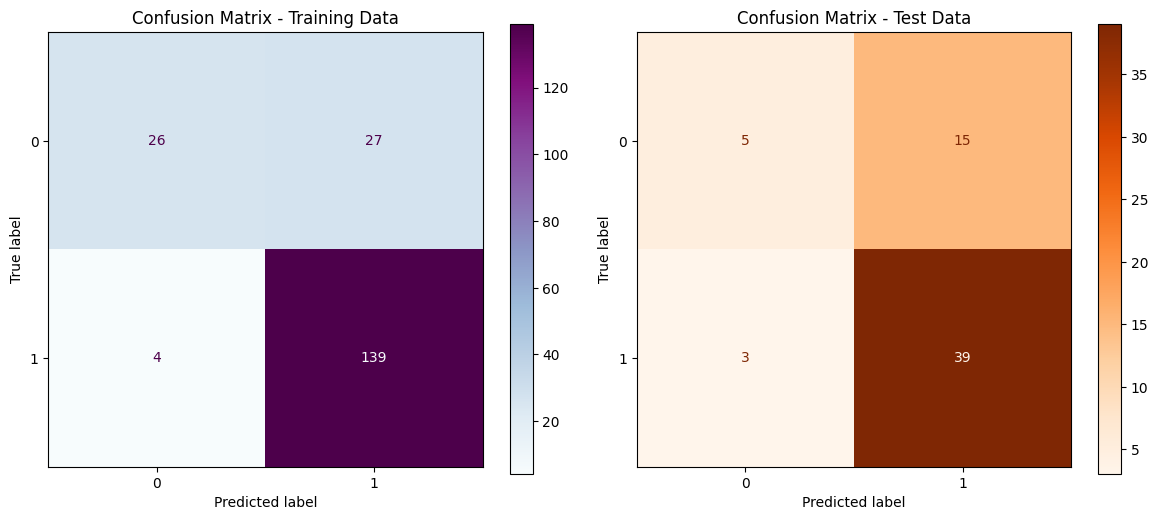

In [78]:
# Membuat subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix untuk training data
train_matrix_knn = ConfusionMatrixDisplay.from_estimator(pipeline_knn, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_knn.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix untuk test data
test_matrix_knn = ConfusionMatrixDisplay.from_estimator(pipeline_knn, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_knn.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 139. Model berhasil memprediksi 139 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 26. Model berhasil memprediksi 26 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 27. Model salah memprediksi 27 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 4. Model salah memprediksi 4 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 39. Model berhasil memprediksi 39 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 5. Model berhasil memprediksi 5 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 15. Model salah memprediksi 15 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 3. Model salah memprediksi 3 sampel kelas 1 (positive) sebagai kelas 0 (negative).

Selanjutnya, dilakukan cek precision score dengan cross validation

In [79]:
#Cross Validation

precision_train_cross_val_knn = cross_val_score(pipeline_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_knn)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_knn.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_knn.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_knn.mean()-precision_train_cross_val_knn.std()) , '-', (precision_train_cross_val_knn.mean()+precision_train_cross_val_knn.std()))

precision Score - All - Cross Validation  :  [0.82142857 0.8        0.72413793]
precision Score - Mean - Cross Validation :  0.7818555008210181
precision Score - Std - Cross Validation  :  0.041739544119176526
precision Score - Range of Test-Set       :  0.7401159567018415 - 0.8235950449401946


Diperoleh rata-rata cross validation sebesar 0.78 dengan STDnya sebesar 0.04.

### 8.1.2 SVM

In [80]:
# Predict pada variabel X
y_pred_train_svc = pipeline_svc.predict(X_train)
y_pred_test_svc = pipeline_svc.predict(X_test)

In [81]:
# Cetak hasil 

print("Accuracy Score")
train_accuracy_svc = accuracy_score(y_train, y_pred_train_svc)
test_accuracy_svc = accuracy_score(y_test,y_pred_test_svc)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_svc, test_accuracy_svc))
print("")
print("Precision Score")
train_precision_svc = precision_score(y_train, y_pred_train_svc)
test_precision_svc = precision_score(y_test,y_pred_test_svc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_svc, test_precision_svc))
print("")
print("Recall Score")
train_recall_svc = recall_score(y_train, y_pred_train_svc)
test_recall_svc = recall_score(y_test,y_pred_test_svc)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_svc, test_recall_svc))
print("")
print("F1 Score")
train_f1_svc = f1_score(y_train, y_pred_train_svc)
test_f1_svc = f1_score(y_test,y_pred_test_svc)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_svc, test_f1_svc))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_svc))

Accuracy Score
Train Score: 0.8520408163265306
Test Score: 0.8064516129032258

Precision Score
Train Precision: 0.8352941176470589
Test Precision: 0.8

Recall Score
Train Recall: 0.993006993006993
Test Recall: 0.9523809523809523

F1 Score
Train F1: 0.9073482428115016
Test F1: 0.8695652173913043

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 0.83 atau 83% sedangkan pada test sebesar 0.8 atau 80% yang berarti memiliki selisih sebesar 0.02 atau 2% < 5%. Hal tersebut menandakan bahwa **model tergolong goodfit**. 
2. Model memiliki akurasi pada train set 85% sedangkan test set 80%, yang berarti bahwa model ini benar dalam 85% kasus pada data train-set dan 80% pada test set.

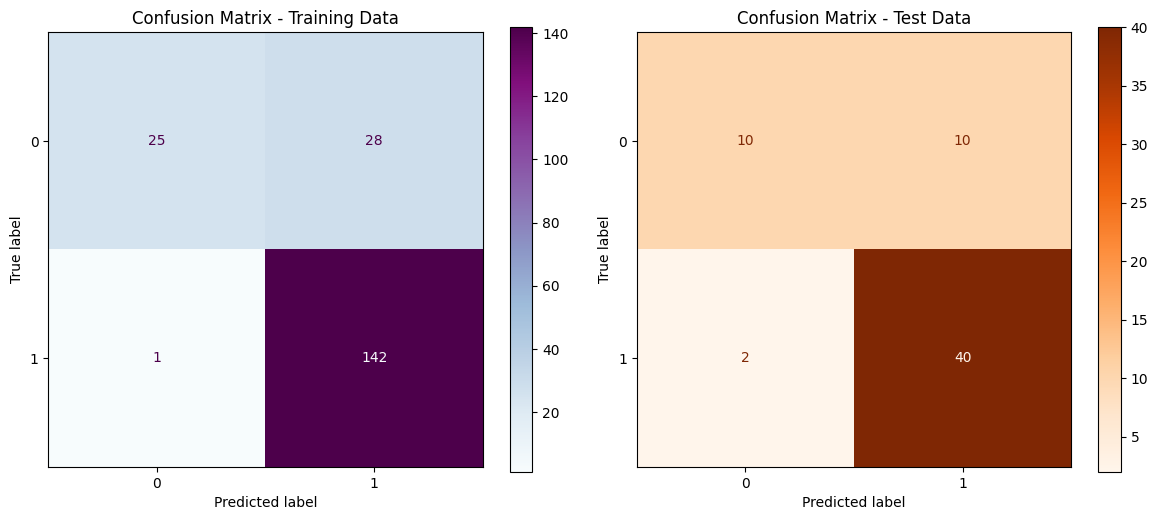

In [82]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_svc = ConfusionMatrixDisplay.from_estimator(pipeline_svc, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_svc.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_svc = ConfusionMatrixDisplay.from_estimator(pipeline_svc, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_svc.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 142. Model berhasil memprediksi 142 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 25. Model berhasil memprediksi 25 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 28. Model salah memprediksi 28 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 1. Model salah memprediksi 1 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 40. Model berhasil memprediksi 40 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 10. Model berhasil memprediksi 10 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 10. Model salah memprediksi 10 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 2. Model salah memprediksi 2 sampel kelas 1 (positive) sebagai kelas 0 (negative).

Selanjutnya, dilakukan cek precision score dengan cross validation


In [83]:
#Cross Validation

precision_train_cross_val_svc = cross_val_score(pipeline_svc,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_svc)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_svc.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_svc.std())

print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_svc.mean()-precision_train_cross_val_svc.std()) , '-', (precision_train_cross_val_svc.mean()+precision_train_cross_val_svc.std()))

precision Score - All - Cross Validation  :  [0.85714286 0.83928571 0.81034483]
precision Score - Mean - Cross Validation :  0.8355911330049262
precision Score - Std - Cross Validation  :  0.01928300358219712
precision Score - Range of Test-Set       :  0.816308129422729 - 0.8548741365871233


Diperoleh rata-rata cross validation sebesar 0.83 dengan STDnya sebesar 0.019.

### 8.1.3 Decision Tree

In [140]:
# Predict pada variabel X
y_pred_train_dt = pipeline_dt.predict(X_train)
y_pred_test_dt = pipeline_dt.predict(X_test)

predict berhasil dilakukan.

In [141]:
# Cetak hasil 
print("Accuracy Score")
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test,y_pred_test_dt)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_dt, test_accuracy_dt))
print("")
print("Precision Score")
train_precision_dt = precision_score(y_train, y_pred_train_dt)
test_precision_dt = precision_score(y_test,y_pred_test_dt)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_dt, test_precision_dt))
print("")
print("Recall Score")
train_recall_dt = recall_score(y_train, y_pred_train_dt)
test_recall_dt = recall_score(y_test,y_pred_test_dt)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_dt, test_recall_dt))
print("")
print("F1 Score")
train_f1_dt = f1_score(y_train, y_pred_train_dt)
test_f1_dt = f1_score(y_test,y_pred_test_dt)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_dt, test_f1_dt))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_dt))

Accuracy Score
Train Score: 1.0
Test Score: 0.6774193548387096

Precision Score
Train Precision: 1.0
Test Precision: 0.7391304347826086

Recall Score
Train Recall: 1.0
Test Recall: 0.8095238095238095

F1 Score
Train F1: 1.0
Test F1: 0.7727272727272727

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        20
           1       0.74      0.81      0.77        42

    accuracy                           0.68        62
   macro avg       0.62      0.60      0.61        62
weighted avg       0.66      0.68      0.67        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 1.0 atau 100% sedangkan pada test sebesar 0.73 atau 73% yang berarti memiliki selisih sebesar 0.27 atau 27% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 100% sedangkan test set 68%, yang berarti bahwa model ini benar dalam 100% kasus pada data train-set dan 68% pada test set.

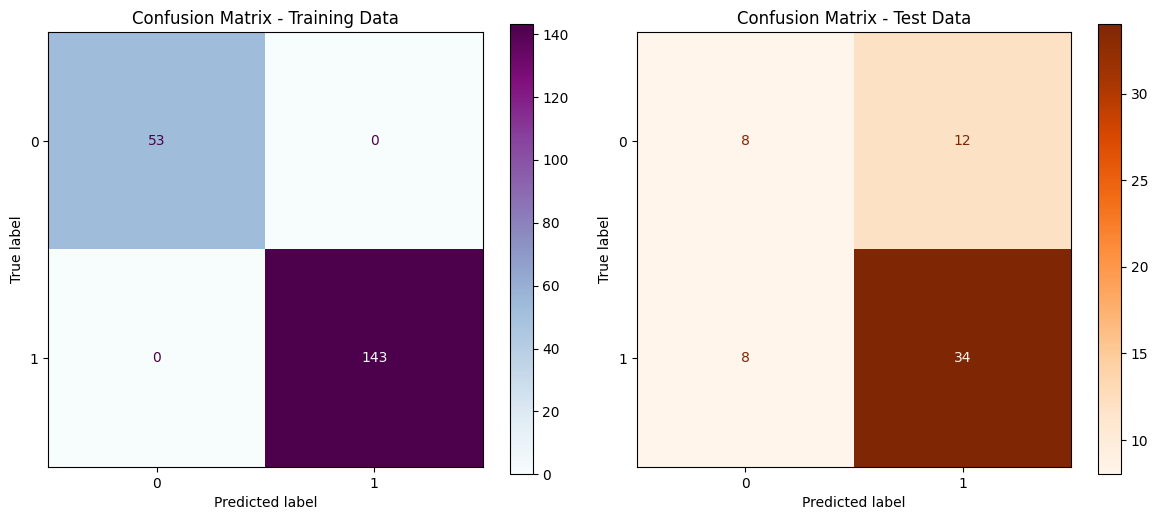

In [142]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_dt = ConfusionMatrixDisplay.from_estimator(pipeline_dt, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_dt.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_dt = ConfusionMatrixDisplay.from_estimator(pipeline_dt, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_dt.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 143. Model berhasil memprediksi 143 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 53. Model berhasil memprediksi 53 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 0. Model salah memprediksi 0 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 0. Model salah memprediksi 0 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 34. Model berhasil memprediksi 34 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 12. Model berhasil memprediksi 12 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 12. Model salah memprediksi 12 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 8. Model salah memprediksi 8 sampel kelas 1 (positive) sebagai kelas 0 (negative).

Selanjutnya, dilakukan cek precision score dengan cross validation

In [87]:
#Cross Validation

precision_train_cross_val_dt = cross_val_score(pipeline_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_dt)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_dt.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_dt.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_dt.mean()-precision_train_cross_val_dt.std()) , '-', (precision_train_cross_val_dt.mean()+precision_train_cross_val_dt.std()))

precision Score - All - Cross Validation  :  [0.88888889 0.88372093 0.81632653]
precision Score - Mean - Cross Validation :  0.862978783244564
precision Score - Std - Cross Validation  :  0.03305552355175229
precision Score - Range of Test-Set       :  0.8299232596928117 - 0.8960343067963163


Diperoleh rata-rata cross validation sebesar 0.86 dengan STDnya sebesar 0.03.

### 8.1.4 Random Forest

In [88]:
# Predict pada variabel X
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

predict berhasil dilakukan.

In [89]:
print("Accuracy Score")
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test,y_pred_test_rf)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_rf, test_accuracy_rf))
print("")
print("Precision Score")
train_precision_rf = precision_score(y_train, y_pred_train_rf)
test_precision_rf = precision_score(y_test,y_pred_test_rf)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_rf, test_precision_rf))
print("")
print("Recall Score")
train_recall_rf = recall_score(y_train, y_pred_train_rf)
test_recall_rf = recall_score(y_test,y_pred_test_rf)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_rf, test_recall_rf))
print("")
print("F1 Score")
train_f1_rf = f1_score(y_train, y_pred_train_rf)
test_f1_rf = f1_score(y_test,y_pred_test_rf)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_rf, test_f1_rf))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_rf))

Accuracy Score
Train Score: 1.0
Test Score: 0.8064516129032258

Precision Score
Train Precision: 1.0
Test Precision: 0.8125

Recall Score
Train Recall: 1.0
Test Recall: 0.9285714285714286

F1 Score
Train F1: 1.0
Test F1: 0.8666666666666667

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.81      0.93      0.87        42

    accuracy                           0.81        62
   macro avg       0.80      0.74      0.76        62
weighted avg       0.80      0.81      0.80        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 1.0 atau 100% sedangkan pada test sebesar 0.81 atau 81% yang berarti memiliki selisih sebesar 0.19 atau 19% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 100% sedangkan test set 80%, yang berarti bahwa model ini benar dalam 100% kasus pada data train-set dan 80% pada test set.

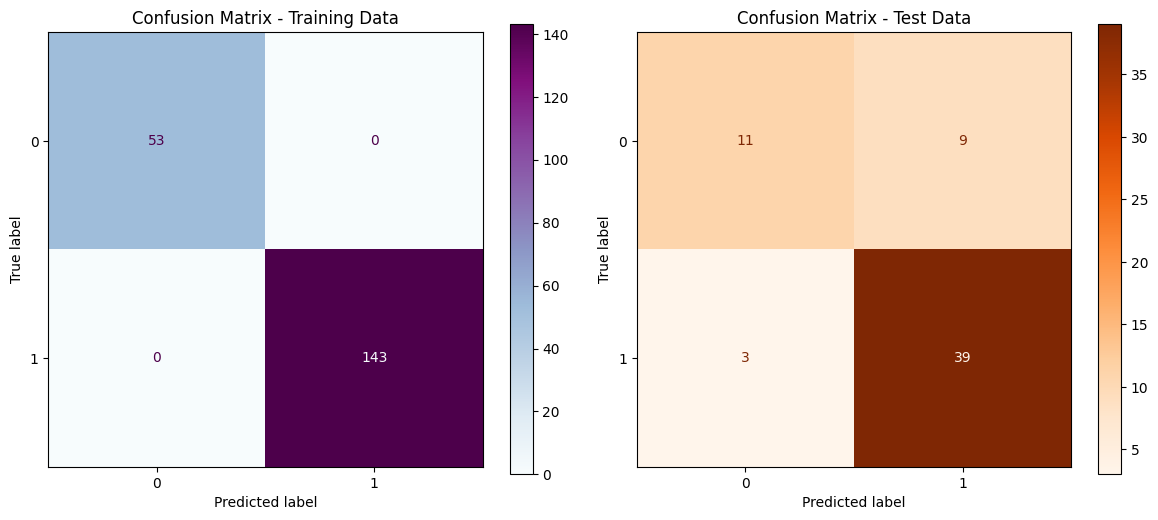

In [90]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_rf = ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_rf.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_rf = ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_rf.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 143. Model berhasil memprediksi 143 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 53. Model berhasil memprediksi 53 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 0. Model salah memprediksi 0 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 0. Model salah memprediksi 0 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 39. Model berhasil memprediksi 39 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 11. Model berhasil memprediksi 10 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 9. Model salah memprediksi 9 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 3. Model salah memprediksi 3 sampel kelas 1 (positive) sebagai kelas 0 (negative).

Selanjutnya, dilakukan cek precision score dengan cross validation

In [91]:
#Cross Validation

precision_train_cross_val_rf = cross_val_score(pipeline_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_rf)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_rf.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_rf.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_rf.mean()-precision_train_cross_val_rf.std()) , '-', (precision_train_cross_val_rf.mean()+precision_train_cross_val_rf.std()))

precision Score - All - Cross Validation  :  [0.88888889 0.85185185 0.81818182]
precision Score - Mean - Cross Validation :  0.8529741863075196
precision Score - Std - Cross Validation  :  0.028876947991624217
precision Score - Range of Test-Set       :  0.8240972383158954 - 0.8818511342991439


Diperoleh rata-rata cross validation sebesar 0.85 dengan STDnya sebesar 0.03.

### 8.1.5 XGBoost

In [92]:
# Predict pada variabel X
y_pred_train_xgb = pipeline_xgb.predict(X_train)
y_pred_test_xgb = pipeline_xgb.predict(X_test)

predict berhasil dilakukan.

In [93]:
print("Accuracy Score")
train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test,y_pred_test_xgb)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_xgb, test_accuracy_xgb))
print("")
print("Precision Score")
train_precision_xgb = precision_score(y_train, y_pred_train_xgb)
test_precision_xgb = precision_score(y_test,y_pred_test_xgb)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_xgb, test_precision_xgb))
print("")
print("Recall Score")
train_recall_xgb = recall_score(y_train, y_pred_train_xgb)
test_recall_xgb = recall_score(y_test,y_pred_test_xgb)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_xgb, test_recall_xgb))
print("")
print("F1 Score")
train_f1_xgb = f1_score(y_train, y_pred_train_xgb)
test_f1_xgb = f1_score(y_test,y_pred_test_xgb)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_xgb, test_f1_xgb))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_xgb))

Accuracy Score
Train Score: 1.0
Test Score: 0.7580645161290323

Precision Score
Train Precision: 1.0
Test Precision: 0.8

Recall Score
Train Recall: 1.0
Test Recall: 0.8571428571428571

F1 Score
Train F1: 1.0
Test F1: 0.8275862068965517

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.80      0.86      0.83        42

    accuracy                           0.76        62
   macro avg       0.72      0.70      0.71        62
weighted avg       0.75      0.76      0.75        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 1.0 atau 100% sedangkan pada test sebesar 0.8 atau 80% yang berarti memiliki selisih sebesar 0.20 atau 20% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 100% sedangkan test set 76%, yang berarti bahwa model ini benar dalam 100% kasus pada data train-set dan 76% pada test set.

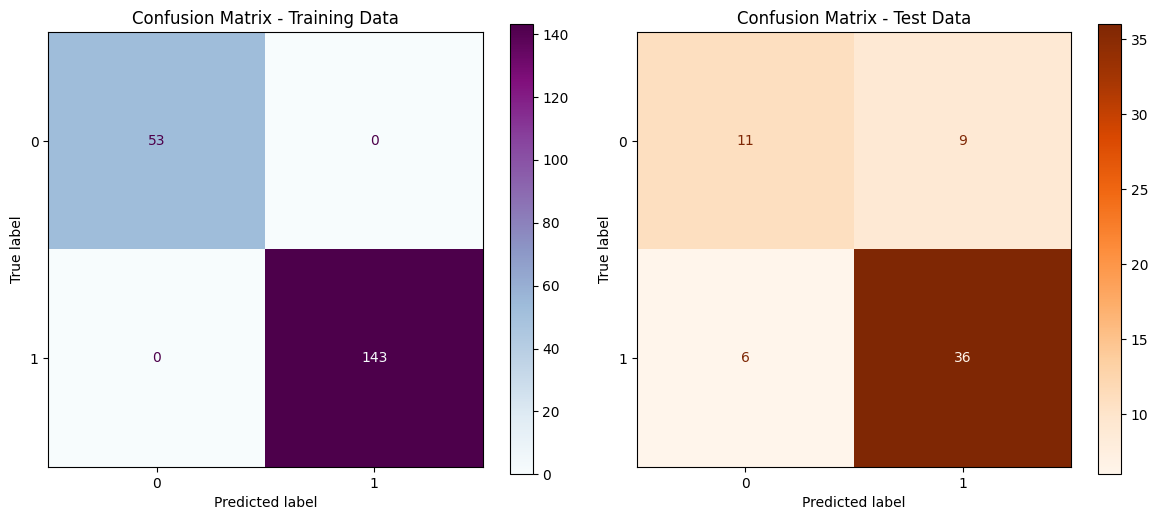

In [94]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_xgb = ConfusionMatrixDisplay.from_estimator(pipeline_xgb, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_xgb.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_xgb = ConfusionMatrixDisplay.from_estimator(pipeline_xgb, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_xgb.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 143. Model berhasil memprediksi 143 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 53. Model berhasil memprediksi 53 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 0. Model salah memprediksi 0 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 0. Model salah memprediksi 0 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 36. Model berhasil memprediksi 36 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 11. Model berhasil memprediksi 11 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 9. Model salah memprediksi 9 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 6. Model salah memprediksi 6 sampel kelas 1 (positive) sebagai kelas 0 (negative).

Selanjutnya, dilakukan cek precision score dengan cross validation

In [95]:
#Cross Validation

precision_train_cross_val_xgb = cross_val_score(pipeline_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_xgb)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_xgb.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_xgb.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_xgb.mean()-precision_train_cross_val_xgb.std()) , '-', (precision_train_cross_val_xgb.mean()+precision_train_cross_val_xgb.std()))

precision Score - All - Cross Validation  :  [0.86666667 0.88636364 0.8125    ]
precision Score - Mean - Cross Validation :  0.8551767676767676
precision Score - Std - Cross Validation  :  0.031230033923702757
precision Score - Range of Test-Set       :  0.8239467337530649 - 0.8864068016004704


Diperoleh rata-rata cross validation sebesar 0.86 dengan STDnya sebesar 0.03.

### 8.1.6 Recapitulation

In [96]:
# Menyimpan kedalam variabel hasil
knn = {
    'train - precision' : precision_score(y_train, y_pred_train_knn),
    'train - recall' : recall_score(y_train, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn),
    'test - recall' : recall_score(y_test, y_pred_test_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_knn.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_knn.std()
}

svc = {
    'train - precision' : precision_score(y_train, y_pred_train_svc),
    'train - recall' : recall_score(y_train, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'test - recall' : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_svc.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_svc.std()
}
dt = {
    'train - precision' : precision_score(y_train, y_pred_train_dt),
    'train - recall' : recall_score(y_train, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt),
    'test - recall' : recall_score(y_test, y_pred_test_dt),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test, y_pred_test_dt),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_dt.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_dt.std()
}
rf = {
    'train - precision' : precision_score(y_train, y_pred_train_rf),
    'train - recall' : recall_score(y_train, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'test - recall' : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_rf.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_rf.std()
}
xgb = {
    'train - precision' : precision_score(y_train, y_pred_train_xgb),
    'train - recall' : recall_score(y_train, y_pred_train_xgb),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_xgb),
    'train - f1_score' : f1_score(y_train, y_pred_train_xgb),
    'test - precision' : precision_score(y_test, y_pred_test_xgb),
    'test - recall' : recall_score(y_test, y_pred_test_xgb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_xgb),
    'test - f1_score' : f1_score(y_test, y_pred_test_xgb),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_xgb.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_xgb.std()
}

In [97]:
# Pembuatan variabel untuk menampung variabel hasil
all_model = {}

all_model["KNN"] = knn
all_model["SVM"] = svc
all_model["DecisionTree"] = dt
all_model["RandomForest"] = rf
all_model["XGBoost"] = xgb

# Di cetak dalam DataFrame
report = pd.DataFrame(all_model)
report

,KNN,SVM,DecisionTree,RandomForest,XGBoost
train - precision,0.837349,0.835294,1.000000,1.000000,1.000000
train - recall,0.972028,0.993007,1.000000,1.000000,1.000000
train - accuracy,0.841837,0.852041,1.000000,1.000000,1.000000
train - f1_score,0.899676,0.907348,1.000000,1.000000,1.000000
test - precision,0.722222,0.800000,0.739130,0.812500,0.800000
test - recall,0.928571,0.952381,0.809524,0.928571,0.857143
test - accuracy_score,0.709677,0.806452,0.677419,0.806452,0.758065
test - f1_score,0.812500,0.869565,0.772727,0.866667,0.827586
precision score - Mean - Cross Validation,0.781856,0.835591,0.862979,0.852974,0.855177
precision score - Std - Cross Validation,0.041740,0.019283,0.033056,0.028877,0.031230


Berdasarkan tabel diatas diperoleh bahwa: 
1. KNN 
   - Selisih train dan test precission 11% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score paling rendah (urutan ke-5) daripada model lain yaitu 0.78 namun memiliki STD tertinggi (urutan ke-1) sebesar 0.042.
2. SVM
   - Selisih train dan test precission 2% < 5% sehingga tergolong goodfit.
   - Rata-rata precission score berada di urutan ke-4 yaitu 0.84 namun memiliki STD terendah (urutan ke-5) sebesar 0.019.
3. Decision Tree
   - Selisih train dan test precission 27% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score paling tinggi (urutan ke-1) yaitu 0.86 dan memiliki STD di urutan ke-2 sebesar 0.033.
4. Random Foreset
   - Selisih train dan test precission 19% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score berada di urutan ke-3 yaitu 0.85 dan memiliki STD di urutan ke-4 sebesar 0.029.
5. XGBoost
   - Selisih train dan test precission 20% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score berada di urutan ke-2 yaitu 0.86 dan memiliki STD di urutan ke-3 sebesar 0.031.

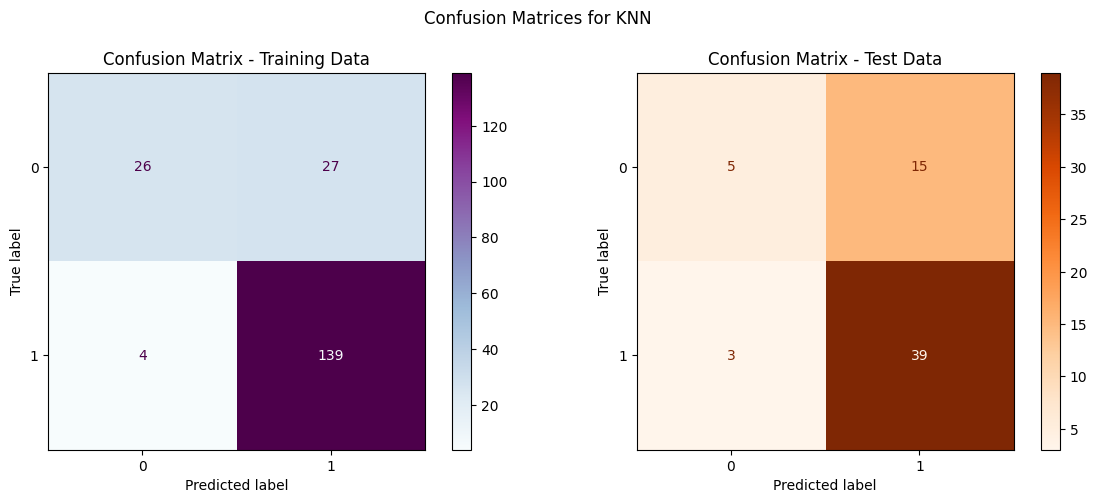

------------------------------------------------------------------------------------------------------------------------------------------------------


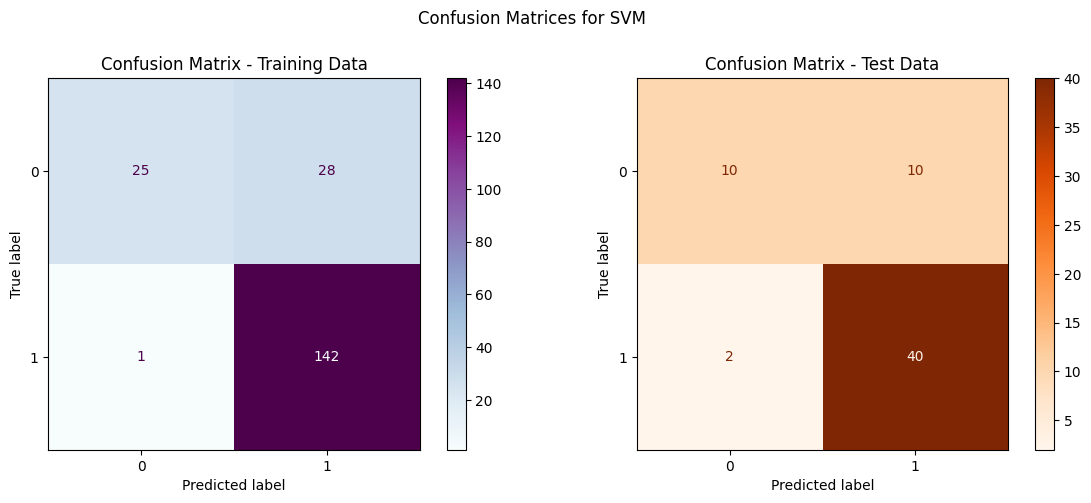

------------------------------------------------------------------------------------------------------------------------------------------------------


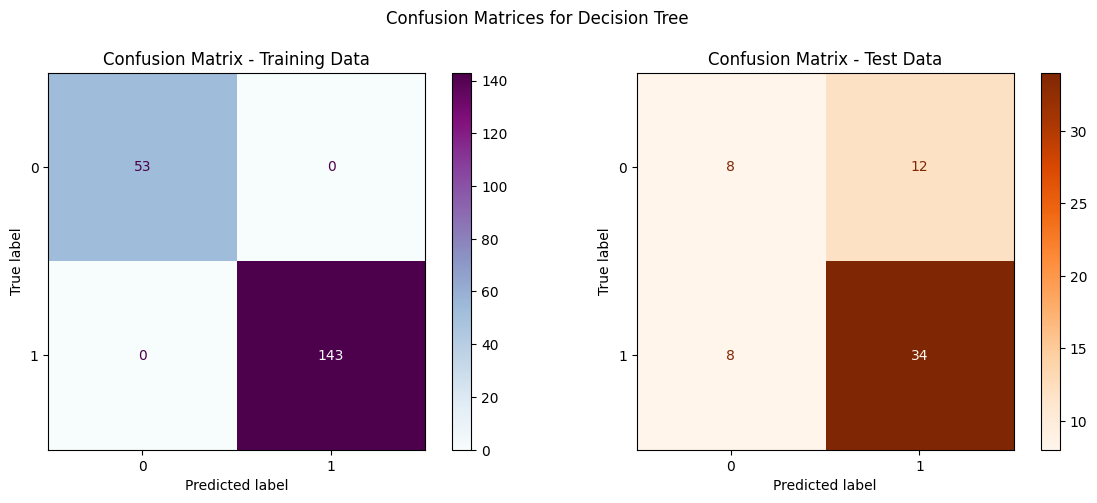

------------------------------------------------------------------------------------------------------------------------------------------------------


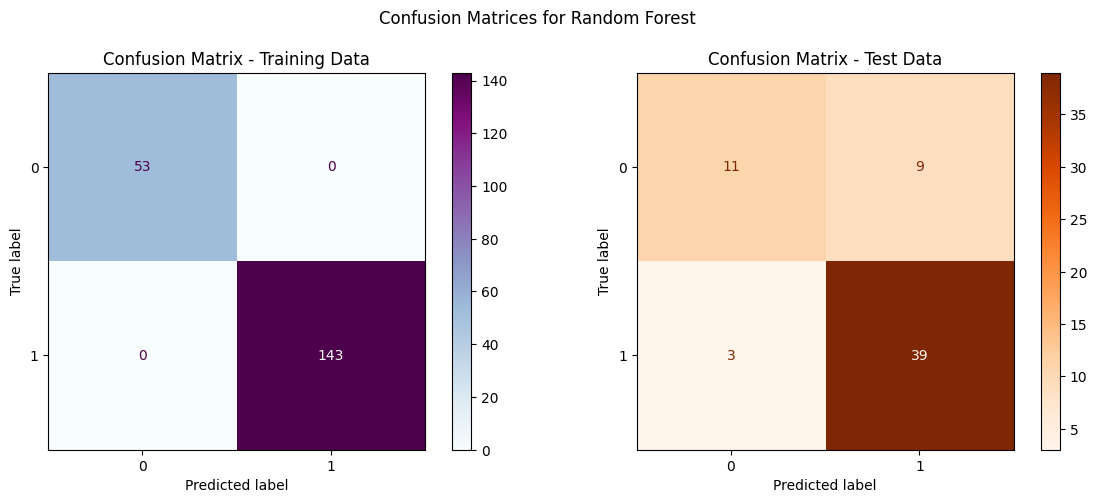

------------------------------------------------------------------------------------------------------------------------------------------------------


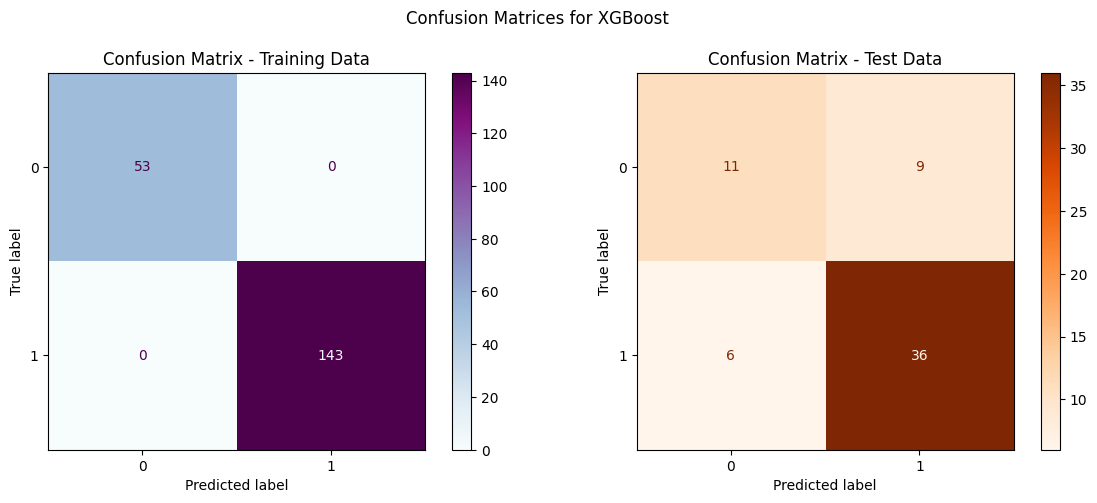

------------------------------------------------------------------------------------------------------------------------------------------------------


In [98]:

# List of pipelines
all_pipeline = [pipeline_knn, pipeline_svc, pipeline_dt, pipeline_rf, pipeline_xgb]
pipeline_names = ["KNN", "SVM", "Decision Tree", "Random Forest", "XGBoost"]

for i, name in zip(all_pipeline, pipeline_names):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot confusion matrix for training data
    ConfusionMatrixDisplay.from_estimator(i, X_train, y_train, cmap='BuPu', ax=axes[0])
    axes[0].set_title('Confusion Matrix - Training Data')

    # Plot confusion matrix for test data
    ConfusionMatrixDisplay.from_estimator(i, X_test, y_test, cmap='Oranges', ax=axes[1])
    axes[1].set_title('Confusion Matrix - Test Data')

    # Set the title for the entire figure
    plt.suptitle(f'Confusion Matrices for {name}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
    plt.show()
    print("---" * 50)


Berdasarkan hasil perbandingan, saya memilih **SVM sebagai model terbaik** dikarenakan model tergolong goodfit dengan hasil STD pada precision score terendah diantara model lain.

## 8.2 Dataset with Hyperparameter Tuning

Karena sudah dilakukan pemilihan model terbaik yaitu SVM maka akan dilakukan hyperparameter tuning agar dapat diperoleh hasil yang lebih optimal. Namun, karena waktu pengerjaan yang cukup maka saya lakukan hyperparameter tuning pada semua model guna membandingkan secara keseluruhan.

### 8.2.1 KNN

Parameter yang digunakan bersumber dari [skicit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [99]:
# parameter tuning

param_knn = {
    'classifier__n_neighbors' : [5, 10, 20],
    'classifier__weights' : ["uniform", 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size' : [10, 20, 30]
}

# Menyiapkan objek GridSearchCV
grid_search_knn = GridSearchCV(pipeline_knn,
                           param_grid=param_knn,
                           scoring='precision',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_o',
                                                                         Pipeline(steps=[('encoder_o',
                                                                                          OrdinalEncoder(categories=[[0,
                                                                                                                      1,
                                                                                                                      2,
                                                                                                                      3]]))]),
                                                                         ['Dependents']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder',
                                                                                          On...
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__leaf_size': [10, 20, 30],
                         'classifier__n_neighbors': [5, 10, 20],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='precision', verbose=2)

In [100]:
# Mengetahui parameter terbaik dan scorenya
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Hyperparameters:", best_params_knn)
print("Best Precision Score:", best_score_knn)

Best Hyperparameters: {'classifier__algorithm': 'auto', 'classifier__leaf_size': 10, 'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}
Best Precision Score: 0.8013514970221252


In [101]:
# Save hasil model dengan tunning
best_knn = grid_search_knn.best_estimator_

# Fit best model on training data
best_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=10))])

model hyperparameter tuning dengan best hyperparameter berhasil disimpan dalam variabel `best_knn`

In [102]:
# # Predict pada variabel X
y_pred_train_grid_knn = best_knn.predict(X_train)
y_pred_test_grid_knn = best_knn.predict(X_test)

predict berhasil dilakukan.

In [103]:
# Cetak hasil 

print("Accuracy Score")
train_accuracy_grid_knn = accuracy_score(y_train, y_pred_train_grid_knn)
test_accuracy_grid_knn = accuracy_score(y_test,y_pred_test_grid_knn)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_knn, test_accuracy_grid_knn))
print("")
print("Precision Score")
train_precision_grid_knn = precision_score(y_train, y_pred_train_grid_knn)
test_precision_grid_knn = precision_score(y_test,y_pred_test_grid_knn)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_knn, test_precision_grid_knn))
print("")
print("Recall Score")
train_recall_grid_knn = recall_score(y_train, y_pred_train_grid_knn)
test_recall_grid_knn = recall_score(y_test,y_pred_test_grid_knn)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_knn, test_recall_grid_knn))
print("")
print("F1 Score")
train_f1_grid_knn = f1_score(y_train, y_pred_train_grid_knn)
test_f1_grid_knn = f1_score(y_test,y_pred_test_grid_knn)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_knn, test_f1_grid_knn))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_knn))

Accuracy Score
Train Score: 0.8112244897959183
Test Score: 0.7580645161290323

Precision Score
Train Precision: 0.8081395348837209
Test Precision: 0.7647058823529411

Recall Score
Train Recall: 0.972027972027972
Test Recall: 0.9285714285714286

F1 Score
Train F1: 0.8825396825396825
Test F1: 0.8387096774193549

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.73      0.40      0.52        20
           1       0.76      0.93      0.84        42

    accuracy                           0.76        62
   macro avg       0.75      0.66      0.68        62
weighted avg       0.75      0.76      0.73        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 0.81 atau 81% sedangkan pada test sebesar 0.76 atau 76% yang berarti memiliki selisih sebesar 0.5 atau 5% = 5%. Hal tersebut menandakan bahwa **model tergolong goodfit**. 
2. Model memiliki akurasi pada train set 81% sedangkan test set 76%, yang berarti bahwa model ini benar dalam 81% kasus pada data train-set dan 76% pada test set.

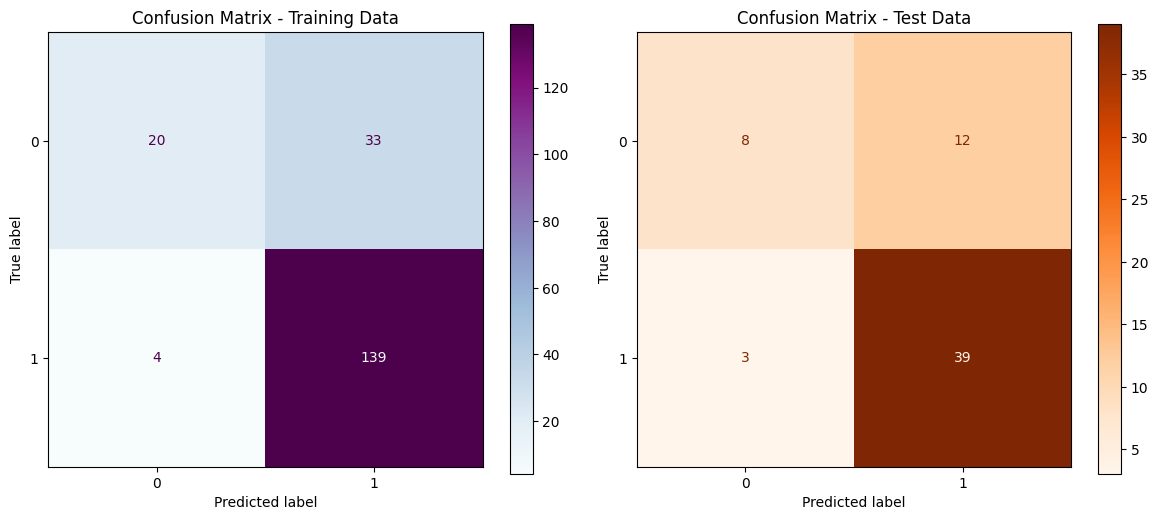

In [104]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_knn, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_xgb.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_xgb.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 139. Model berhasil memprediksi 139 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 20. Model berhasil memprediksi 20 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 33. Model salah memprediksi 33 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 4. Model salah memprediksi 4 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 39. Model berhasil memprediksi 39 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 8. Model berhasil memprediksi 8 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 12. Model salah memprediksi 12 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 3. Model salah memprediksi 3 sampel kelas 1 (positive) sebagai kelas 0 (negative).

In [105]:
#Cross Validation

precision_train_cross_val_knn_hp = cross_val_score(best_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_knn_hp)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_knn_hp.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_knn_hp.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_knn_hp.mean()-precision_train_cross_val_knn_hp.std()) , '-', (precision_train_cross_val_knn_hp.mean()+precision_train_cross_val_knn_hp.std()))

precision Score - All - Cross Validation  :  [0.8245614  0.82142857 0.75806452]
precision Score - Mean - Cross Validation :  0.8013514970221252
precision Score - Std - Cross Validation  :  0.030635226949161307
precision Score - Range of Test-Set       :  0.7707162700729638 - 0.8319867239712865


Diperoleh rata-rata cross validation sebesar 0.80 dengan STDnya sebesar 0.03.

### 8.2.2 SVM

Parameter yang digunakan bersumber dari [skicit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [106]:
# parameter tuning

param_svc = {
    'classifier__C' : [0.1, 0.5, 1, 2, 3],
    'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'classifier__degree' : [1,2,3,4,5],
    'classifier__gamma' : ['scale', 'auto'],
    'classifier__coef0' : [0.0, 0.1],
    'classifier__cache_size' : [100, 200]
}

# Menyiapkan objek GridSearchCV
grid_search_svc = GridSearchCV(pipeline_svc,
                           param_grid=param_svc,
                           scoring='precision',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_svc.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
600 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOV

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_o',
                                                                         Pipeline(steps=[('encoder_o',
                                                                                          OrdinalEncoder(categories=[[0,
                                                                                                                      1,
                                                                                                                      2,
                                                                                                                      3]]))]),
                                                                         ['Dependents']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder',
                                                                                          On...
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 0.5, 1, 2, 3],
                         'classifier__cache_size': [100, 200],
                         'classifier__coef0': [0.0, 0.1],
                         'classifier__degree': [1, 2, 3, 4, 5],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']},
             scoring='precision', verbose=2)

In [107]:
# Mengetahui parameter terbaik dan scorenya
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best Hyperparameters:", best_params_svc)
print("Best Precision Score:", best_score_svc)

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__cache_size': 100, 'classifier__coef0': 0.0, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Precision Score: 0.8355911330049262


In [108]:
# Save hasil model dengan tunning
best_svc = grid_search_svc.best_estimator_

# Fit best model on training data
best_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier',
                 SVC(C=0.1, cache_size=100, degree=1, kernel='linear'))])

model hyperparameter tuning dengan best hyperparameter berhasil disimpan dalam variabel `best_svc`

In [109]:
# Predict pada variabel X

y_pred_train_grid_svc = best_svc.predict(X_train)
y_pred_test_grid_svc = best_svc.predict(X_test)

predict berhasil dilakukan.

In [110]:
# Cetak hasil 

print("Accuracy Score")
train_accuracy_grid_svc = accuracy_score(y_train, y_pred_train_grid_svc)
test_accuracy_grid_svc = accuracy_score(y_test,y_pred_test_grid_svc)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_svc, test_accuracy_grid_svc))
print("")
print("Precision Score")
train_precision_grid_svc = precision_score(y_train, y_pred_train_grid_svc)
test_precision_grid_svc = precision_score(y_test,y_pred_test_grid_svc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_svc, test_precision_grid_svc))
print("")
print("Recall Score")
train_recall_grid_svc = recall_score(y_train, y_pred_train_grid_svc)
test_recall_grid_svc = recall_score(y_test,y_pred_test_grid_svc)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_svc, test_recall_grid_svc))
print("")
print("F1 Score")
train_f1_grid_svc = f1_score(y_train, y_pred_train_grid_svc)
test_f1_grid_svc = f1_score(y_test,y_pred_test_grid_svc)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_svc, test_f1_grid_svc))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_svc))

Accuracy Score
Train Score: 0.8520408163265306
Test Score: 0.8064516129032258

Precision Score
Train Precision: 0.8352941176470589
Test Precision: 0.8

Recall Score
Train Recall: 0.993006993006993
Test Recall: 0.9523809523809523

F1 Score
Train F1: 0.9073482428115016
Test F1: 0.8695652173913043

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 0.83 atau 83% sedangkan pada test sebesar 0.81 atau 81% yang berarti memiliki selisih sebesar 0.2 atau 2% < 5%. Hal tersebut menandakan bahwa **model tergolong goodfit**. 
2. Model memiliki akurasi pada train set 85% sedangkan test set 81%, yang berarti bahwa model ini benar dalam 85% kasus pada data train-set dan 81% pada test set.

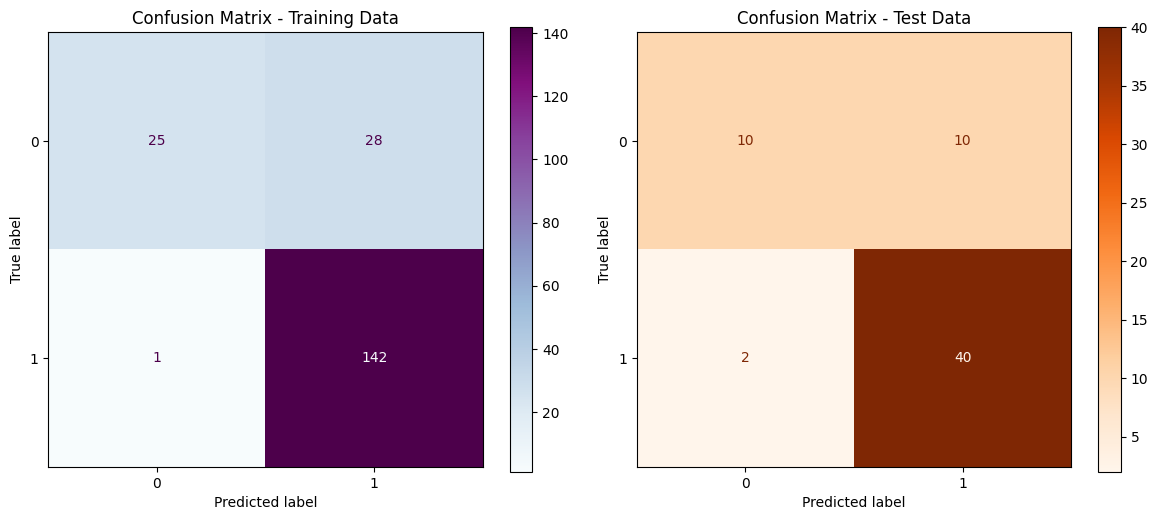

In [111]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_svc, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_xgb.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_svc, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_xgb.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 142. Model berhasil memprediksi 142 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 25. Model berhasil memprediksi 25 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 28. Model salah memprediksi 28 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 1. Model salah memprediksi 1 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 40. Model berhasil memprediksi 40 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 10. Model berhasil memprediksi 10 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 10. Model salah memprediksi 10 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 2. Model salah memprediksi 2 sampel kelas 1 (positive) sebagai kelas 0 (negative).

In [112]:
#Cross Validation

precision_train_cross_val_svc_hp = cross_val_score(best_svc,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_svc_hp)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_svc_hp.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_svc_hp.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_svc_hp.mean()-precision_train_cross_val_svc_hp.std()) , '-', (precision_train_cross_val_svc_hp.mean()+precision_train_cross_val_svc_hp.std()))

precision Score - All - Cross Validation  :  [0.85714286 0.83928571 0.81034483]
precision Score - Mean - Cross Validation :  0.8355911330049262
precision Score - Std - Cross Validation  :  0.01928300358219712
precision Score - Range of Test-Set       :  0.816308129422729 - 0.8548741365871233


Diperoleh rata-rata cross validation sebesar 0.84 dengan STDnya sebesar 0.019.

### 8.2.3 Decision Tree

Parameter yang digunakan bersumber dari [skicit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [113]:
# parameter tuning

param_dt = {
    'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__splitter' : ['best', 'random'],
    'classifier__max_depth' : [None,1,2],
    'classifier__min_samples_split': [1,2,3],
    'classifier__min_samples_leaf': [1,2,3],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Menyiapkan objek GridSearchCV
grid_search_dt = GridSearchCV(pipeline_dt,
                           param_grid=param_dt,
                           scoring='precision',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train, y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOV

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_o',
                                                                         Pipeline(steps=[('encoder_o',
                                                                                          OrdinalEncoder(categories=[[0,
                                                                                                                      1,
                                                                                                                      2,
                                                                                                                      3]]))]),
                                                                         ['Dependents']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder',
                                                                                          On...
                                        DecisionTreeClassifier(random_state=24))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [None, 1, 2],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 3],
                         'classifier__min_samples_split': [1, 2, 3],
                         'classifier__splitter': ['best', 'random']},
             scoring='precision', verbose=2)

In [114]:
# Mengetahui parameter terbaik dan scorenya
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Hyperparameters:", best_params_dt)
print("Best Precision Score:", best_score_dt)

Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Best Precision Score: 0.8712737127371274


In [115]:
# Save hasil model dengan tunning
best_dt = grid_search_dt.best_estimator_

# Fit best model on training data
best_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier',
                 DecisionTreeClassifier(min_samples_leaf=3, random_state=24))])

model hyperparameter tuning dengan best hyperparameter berhasil disimpan dalam variabel `best_dt`

In [116]:
# Predict pada variabel X
y_pred_train_grid_dt = best_dt.predict(X_train)
y_pred_test_grid_dt = best_dt.predict(X_test)

predict berhasil dilakukan.

In [117]:
print("Accuracy Score")
train_accuracy_grid_dt = accuracy_score(y_train, y_pred_train_grid_dt)
test_accuracy_grid_dt = accuracy_score(y_test,y_pred_test_grid_dt)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_dt, test_accuracy_grid_dt))
print("")
print("Precision Score")
train_precision_grid_dt = precision_score(y_train, y_pred_train_grid_dt)
test_precision_grid_dt = precision_score(y_test,y_pred_test_grid_dt)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_dt, test_precision_grid_dt))
print("")
print("Recall Score")
train_recall_grid_dt = recall_score(y_train, y_pred_train_grid_dt)
test_recall_grid_dt = recall_score(y_test,y_pred_test_grid_dt)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_dt, test_recall_grid_dt))
print("")
print("F1 Score")
train_f1_grid_dt = f1_score(y_train, y_pred_train_grid_dt)
test_f1_grid_dt = f1_score(y_test,y_pred_test_grid_dt)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_dt, test_f1_grid_dt))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_dt))

Accuracy Score
Train Score: 0.9285714285714286
Test Score: 0.6935483870967742

Precision Score
Train Precision: 0.9448275862068966
Test Precision: 0.7674418604651163

Recall Score
Train Recall: 0.958041958041958
Test Recall: 0.7857142857142857

F1 Score
Train F1: 0.9513888888888888
Test F1: 0.7764705882352941

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.77      0.79      0.78        42

    accuracy                           0.69        62
   macro avg       0.65      0.64      0.64        62
weighted avg       0.69      0.69      0.69        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 0.94 atau 94% sedangkan pada test sebesar 0.77 atau 77% yang berarti memiliki selisih sebesar 0.17 atau 17% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 93% sedangkan test set 69%, yang berarti bahwa model ini benar dalam 93% kasus pada data train-set dan 69% pada test set.

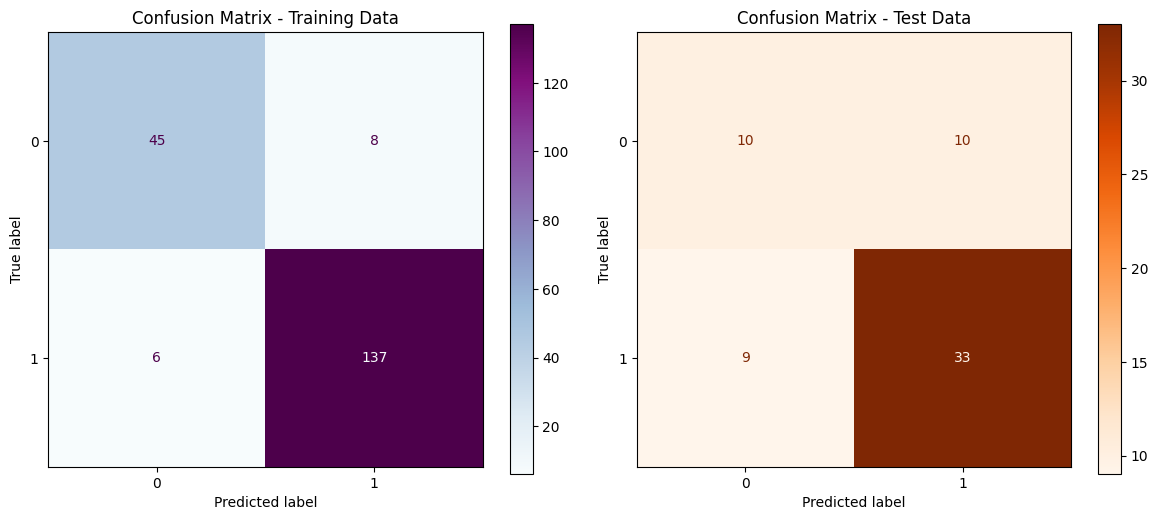

In [118]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_dt, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_xgb.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_xgb.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 137. Model berhasil memprediksi 137 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 45. Model berhasil memprediksi 45 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 8. Model salah memprediksi 8 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 6. Model salah memprediksi 6 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 33. Model berhasil memprediksi 33 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 10. Model berhasil memprediksi 10 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 10. Model salah memprediksi 10 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 9. Model salah memprediksi 9 sampel kelas 1 (positive) sebagai kelas 0 (negative).

In [119]:
#Cross Validation

precision_train_cross_val_dt_hp = cross_val_score(best_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_dt_hp)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_dt_hp.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_dt_hp.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_dt_hp.mean()-precision_train_cross_val_dt_hp.std()) , '-', (precision_train_cross_val_dt_hp.mean()+precision_train_cross_val_dt_hp.std()))

precision Score - All - Cross Validation  :  [0.87804878 0.90243902 0.83333333]
precision Score - Mean - Cross Validation :  0.8712737127371274
precision Score - Std - Cross Validation  :  0.028616141032442914
precision Score - Range of Test-Set       :  0.8426575717046845 - 0.8998898537695703


Diperoleh rata-rata cross validation sebesar 0.87 dengan STDnya sebesar 0.03.

### 8.2.4 Random Forest

Parameter yang digunakan bersumber dari [skicit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [143]:
# parameter tuning

param_rf = {
    'classifier__n_estimators' : [50, 100, 200, 300],
    'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__min_samples_split': [1,2,3,4],
    'classifier__min_samples_leaf': [1,2,3,4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Menyiapkan objek GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf,
                           param_grid=param_rf,
                           scoring='precision',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOV

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_o',
                                                                         Pipeline(steps=[('encoder_o',
                                                                                          OrdinalEncoder(categories=[[0,
                                                                                                                      1,
                                                                                                                      2,
                                                                                                                      3]]))]),
                                                                         ['Dependents']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder',
                                                                                          On...
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 3, 4],
                         'classifier__min_samples_split': [1, 2, 3, 4],
                         'classifier__n_estimators': [50, 100, 200, 300]},
             scoring='precision', verbose=2)

In [144]:
# Mengetahui parameter terbaik dan scorenya
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Hyperparameters:", best_params_rf)
print("Best Precision Score:", best_score_rf)

Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_features': None, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 50}
Best Precision Score: 0.8582798988814027


In [145]:
# Save hasil model dengan tunning
best_rf = grid_search_rf.best_estimator_

# Fit best model on training data
best_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_features=None,
                                        min_samples_leaf=3, min_samples_split=4,
                                        n_estimators=50))])

model hyperparameter tuning dengan best hyperparameter berhasil disimpan dalam variabel `best_rf`

In [146]:
# Predict pada variabel X
y_pred_train_grid_rf = best_rf.predict(X_train)
y_pred_test_grid_rf = best_rf.predict(X_test)

predict berhasil dilakukan.

In [147]:
# Cetak hasil 

print("Accuracy Score")
train_accuracy_grid_rf = accuracy_score(y_train, y_pred_train_grid_rf)
test_accuracy_grid_rf = accuracy_score(y_test,y_pred_test_grid_rf)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_rf, test_accuracy_grid_rf))
print("")
print("Precision Score")
train_precision_grid_rf = precision_score(y_train, y_pred_train_grid_rf)
test_precision_grid_rf = precision_score(y_test,y_pred_test_grid_rf)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_rf, test_precision_grid_rf))
print("")
print("Recall Score")
train_recall_grid_rf = recall_score(y_train, y_pred_train_grid_rf)
test_recall_grid_rf = recall_score(y_test,y_pred_test_grid_rf)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_rf, test_recall_grid_rf))
print("")
print("F1 Score")
train_f1_grid_rf = f1_score(y_train, y_pred_train_grid_rf)
test_f1_grid_rf = f1_score(y_test,y_pred_test_grid_rf)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_rf, test_f1_grid_rf))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_rf))

Accuracy Score
Train Score: 0.9183673469387755
Test Score: 0.7741935483870968

Precision Score
Train Precision: 0.9044585987261147
Test Precision: 0.7916666666666666

Recall Score
Train Recall: 0.993006993006993
Test Recall: 0.9047619047619048

F1 Score
Train F1: 0.9466666666666667
Test F1: 0.8444444444444444

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.79      0.90      0.84        42

    accuracy                           0.77        62
   macro avg       0.75      0.70      0.72        62
weighted avg       0.77      0.77      0.76        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 0.90 atau 90% sedangkan pada test sebesar 0.79 atau 79% yang berarti memiliki selisih sebesar 0.20 atau 20% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 99% sedangkan test set 77%, yang berarti bahwa model ini benar dalam 99% kasus pada data train-set dan 77% pada test set.

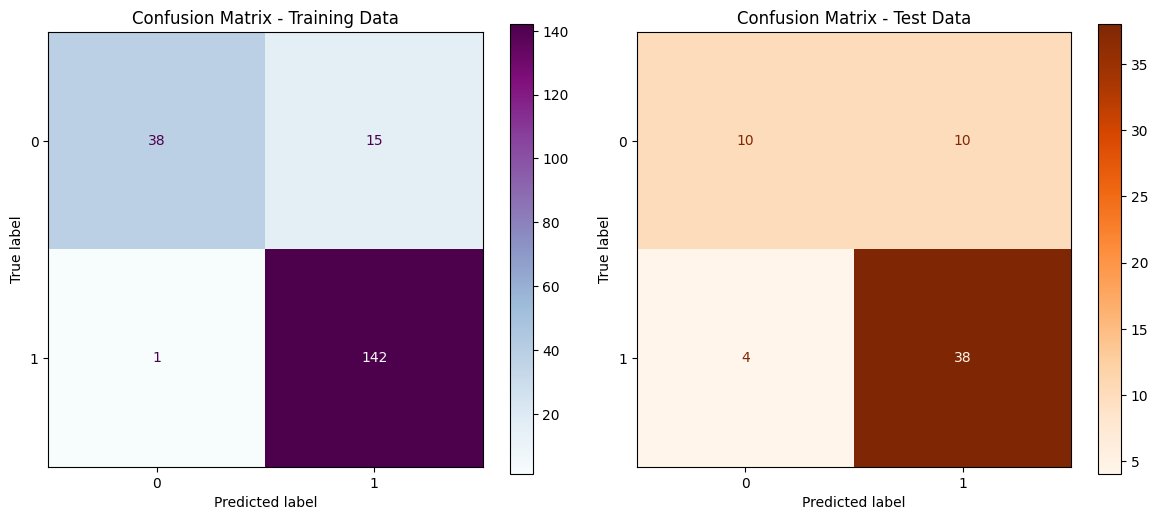

In [148]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_rf, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_xgb.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_xgb.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 142. Model berhasil memprediksi 142 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 38. Model berhasil memprediksi 38 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 15. Model salah memprediksi 15 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 1. Model salah memprediksi 1 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 38. Model berhasil memprediksi 38 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 10. Model berhasil memprediksi 10 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 10. Model salah memprediksi 10 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 4. Model salah memprediksi 4 sampel kelas 1 (positive) sebagai kelas 0 (negative).

In [149]:
#Cross Validation

precision_train_cross_val_rf_hp = cross_val_score(best_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_rf_hp)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_rf_hp.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_rf_hp.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_rf_hp.mean()-precision_train_cross_val_rf_hp.std()) , '-', (precision_train_cross_val_rf_hp.mean()+precision_train_cross_val_rf_hp.std()))

precision Score - All - Cross Validation  :  [0.87037037 0.84615385 0.82142857]
precision Score - Mean - Cross Validation :  0.8459842626509294
precision Score - Std - Cross Validation  :  0.019980765581565592
precision Score - Range of Test-Set       :  0.8260034970693638 - 0.865965028232495


Diperoleh rata-rata cross validation sebesar 0.85 dengan STDnya sebesar 0.02.

### 8.2.5 XGBoost

Parameter yang digunakan bersumber dari [skicit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)


In [127]:
# parameter tuning

param_xgb = {
    'classifier__loss' : ['log_loss', 'exponential'],
    'classifier__learning_rate' : [0.1, 0.5, 1],
    'classifier__n_estimators' : [50, 100, 200, 300],
    'classifier__criterion' : ['friedman_mse', 'squared_error'],
    'classifier__min_samples_split': [1,2,3,4],
    'classifier__min_samples_leaf': [1,2,3,4],
}

# Menyiapkan objek GridSearchCV
grid_search_xgb = GridSearchCV(pipeline_xgb,
                           param_grid=param_xgb,
                           scoring='precision',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "loss", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_o',
                                                                         Pipeline(steps=[('encoder_o',
                                                                                          OrdinalEncoder(categories=[[0,
                                                                                                                      1,
                                                                                                                      2,
                                                                                                                      3]]))]),
                                                                         ['Dependents']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder',
                                                                                          On...
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['friedman_mse',
                                                   'squared_error'],
                         'classifier__learning_rate': [0.1, 0.5, 1],
                         'classifier__loss': ['log_loss', 'exponential'],
                         'classifier__min_samples_leaf': [1, 2, 3, 4],
                         'classifier__min_samples_split': [1, 2, 3, 4],
                         'classifier__n_estimators': [50, 100, 200, 300]},
             scoring='precision', verbose=2)

In [128]:
# Mengetahui parameter terbaik dan scorenya
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Hyperparameters:", best_params_xgb)
print("Best Precision Score:", best_score_xgb)

Best Hyperparameters: {'classifier__criterion': 'friedman_mse', 'classifier__learning_rate': 0.5, 'classifier__loss': 'log_loss', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 1, 'classifier__n_estimators': 50}
Best Precision Score: 0.8598161098161098


In [129]:
# Save hasil model dengan tunning
best_xgb = grid_search_xgb.best_estimator_

# Fit best model on training data
best_xgb.fit(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "loss", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat_o',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Dependents']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               loss='log_loss', max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               min_samples_leaf=1, min_samples_split=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, ...))])

model hyperparameter tuning dengan best hyperparameter berhasil disimpan dalam variabel `best_xgb`

In [130]:
# Predict pada variabel X
y_pred_train_grid_xgb = best_xgb.predict(X_train)
y_pred_test_grid_xgb = best_xgb.predict(X_test)

predict berhasil dilakukan.

In [131]:
# Cetak hasil 
print("Accuracy Score")
train_accuracy_grid_xgb = accuracy_score(y_train, y_pred_train_grid_xgb)
test_accuracy_grid_xgb = accuracy_score(y_test,y_pred_test_grid_xgb)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_xgb, test_accuracy_grid_xgb))
print("")
print("Precision Score")
train_precision_grid_xgb = precision_score(y_train, y_pred_train_grid_xgb)
test_precision_grid_xgb = precision_score(y_test,y_pred_test_grid_xgb)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_xgb, test_precision_grid_xgb))
print("")
print("Recall Score")
train_recall_grid_xgb = recall_score(y_train, y_pred_train_grid_xgb)
test_recall_grid_xgb = recall_score(y_test,y_pred_test_grid_xgb)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_xgb, test_recall_grid_xgb))
print("")
print("F1 Score")
train_f1_grid_xgb = f1_score(y_train, y_pred_train_grid_xgb)
test_f1_grid_xgb = f1_score(y_test,y_pred_test_grid_xgb)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_xgb, test_f1_grid_xgb))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_xgb))

Accuracy Score
Train Score: 1.0
Test Score: 0.7741935483870968

Precision Score
Train Precision: 1.0
Test Precision: 0.8043478260869565

Recall Score
Train Recall: 1.0
Test Recall: 0.8809523809523809

F1 Score
Train F1: 1.0
Test F1: 0.8409090909090909

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.80      0.88      0.84        42

    accuracy                           0.77        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.77      0.77      0.77        62



Dari hasil diatas diperoleh bahwa:
1. Sesuai dengan metriks utama yaitu precission, maka dari data diatas dapat dilihat bahwa nilai precission pada train sebesar 1.00 atau 100% sedangkan pada test sebesar 0.80 atau 80% yang berarti memiliki selisih sebesar 0.20 atau 20% > 5%. Hal tersebut menandakan bahwa **model tergolong overfit**. 
2. Model memiliki akurasi pada train set 100% sedangkan test set 77%, yang berarti bahwa model ini benar dalam 100% kasus pada data train-set dan 77% pada test set.

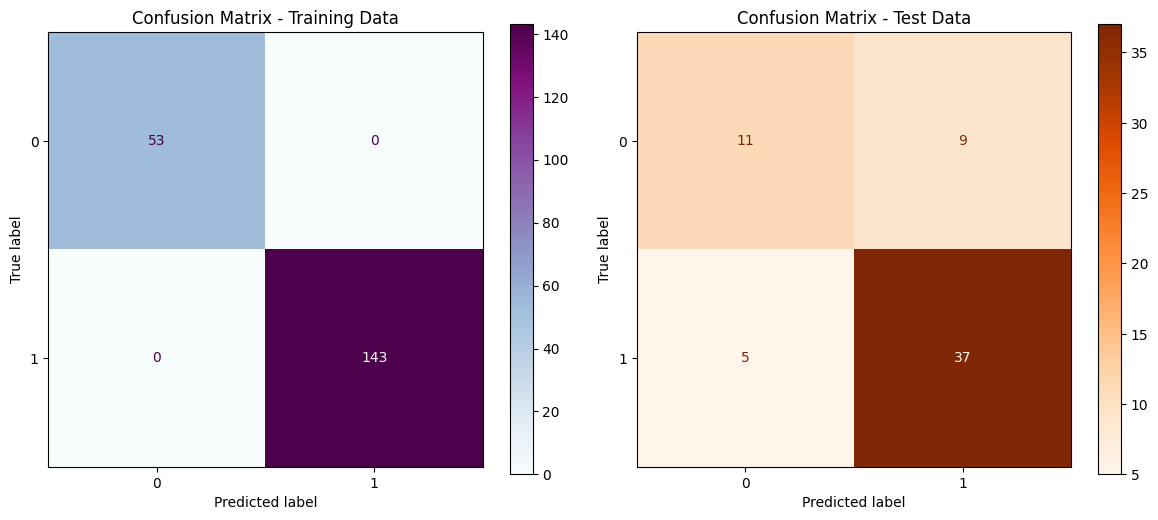

In [132]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_xgb, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix_xgb.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_xgb = ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_xgb.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari hasil confussion matrix perlu diingat bahwa 0 berarti loan tidak di approved dan 1 berarti loan di approved, sehingga menghasilkan:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 143. Model berhasil memprediksi 143 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 53. Model berhasil memprediksi 53 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 0. Model salah memprediksi 0 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 0. Model salah memprediksi 0 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 37. Model berhasil memprediksi 37 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 11. Model berhasil memprediksi 11 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 9. Model salah memprediksi 9 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 5. Model salah memprediksi 5 sampel kelas 1 (positive) sebagai kelas 0 (negative).

In [133]:
#Cross Validation

precision_train_cross_val_xgb_hp = cross_val_score(best_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="precision")

print('precision Score - All - Cross Validation  : ', precision_train_cross_val_xgb_hp)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_xgb_hp.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_xgb_hp.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_xgb_hp.mean()-precision_train_cross_val_xgb_hp.std()) , '-', (precision_train_cross_val_xgb_hp.mean()+precision_train_cross_val_xgb_hp.std()))

precision Score - All - Cross Validation  :  [0.86363636 0.88888889 0.82692308]
precision Score - Mean - Cross Validation :  0.8598161098161098
precision Score - Std - Cross Validation  :  0.02544125544051059
precision Score - Range of Test-Set       :  0.8343748543755992 - 0.8852573652566204


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "loss", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "loss", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xg

Diperoleh rata-rata cross validation sebesar 0.86 dengan STDnya sebesar 0.025.

### 8.2.6 Recapitulation

In [151]:
# Menyimpan kedalam variabel hasil
knn_hp = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_knn),
    'train - recall' : recall_score(y_train, y_pred_train_grid_knn),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_knn),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_knn),
    'test - precision' : precision_score(y_test, y_pred_test_grid_knn),
    'test - recall' : recall_score(y_test, y_pred_test_grid_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_knn),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_knn_hp.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_knn_hp.std()
}

svc_hp = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_svc),
    'train - recall' : recall_score(y_train, y_pred_train_grid_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_svc),
    'test - precision' : precision_score(y_test, y_pred_test_grid_svc),
    'test - recall' : recall_score(y_test, y_pred_test_grid_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_svc),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_svc_hp.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_svc_hp.std()
}
dt_hp = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_dt),
    'train - recall' : recall_score(y_train, y_pred_train_grid_dt),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_dt),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_dt),
    'test - precision' : precision_score(y_test, y_pred_test_grid_dt),
    'test - recall' : recall_score(y_test, y_pred_test_grid_dt),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_dt),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_dt),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_dt_hp.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_dt_hp.std()
}
rf_hp = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_rf),
    'train - recall' : recall_score(y_train, y_pred_train_grid_rf),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_rf),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_rf),
    'test - precision' : precision_score(y_test, y_pred_test_grid_rf),
    'test - recall' : recall_score(y_test, y_pred_test_grid_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_rf),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_rf_hp.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_rf_hp.std()
}
xgb_hp = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_xgb),
    'train - recall' : recall_score(y_train, y_pred_train_grid_xgb),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_xgb),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_xgb),
    'test - precision' : precision_score(y_test, y_pred_test_grid_xgb),
    'test - recall' : recall_score(y_test, y_pred_test_grid_xgb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_xgb),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_xgb),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_xgb_hp.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_xgb_hp.std()
}

In [152]:
# Pembuatan variabel untuk menampung variabel hasil
all_model_hp = {}

all_model_hp["KNN"] = knn_hp
all_model_hp["SVM"] = svc_hp
all_model_hp["DecisionTree"] = dt_hp
all_model_hp["RandomForest"] = rf_hp
all_model_hp["XGBoost"] = xgb_hp

# Di cetak dalam DataFrame
report_hp = pd.DataFrame(all_model_hp)
report_hp

,KNN,SVM,DecisionTree,RandomForest,XGBoost
train - precision,0.808140,0.835294,0.944828,0.904459,1.000000
train - recall,0.972028,0.993007,0.958042,0.993007,1.000000
train - accuracy,0.811224,0.852041,0.928571,0.918367,1.000000
train - f1_score,0.882540,0.907348,0.951389,0.946667,1.000000
test - precision,0.764706,0.800000,0.767442,0.791667,0.804348
test - recall,0.928571,0.952381,0.785714,0.904762,0.880952
test - accuracy_score,0.758065,0.806452,0.693548,0.774194,0.774194
test - f1_score,0.838710,0.869565,0.776471,0.844444,0.840909
precision score - Mean - Cross Validation,0.801351,0.835591,0.871274,0.845984,0.859816
precision score - Std - Cross Validation,0.030635,0.019283,0.028616,0.019981,0.025441


Berdasarkan tabel diatas diperoleh bahwa: 
1. KNN 
   - Selisih train dan test precission 5% = 5% sehingga tergolong goodfit. 
   - Rata-rata precission score paling rendah (urutan ke-5) daripada model lain yaitu 0.80 namun memiliki STD tertinggi (urutan ke-1) sebesar 0.031.
2. SVM
   - Selisih train dan test precission 2% < 5% sehingga tergolong goodfit.
   - Rata-rata precission score berada di urutan ke-4 yaitu 0.84 namun memiliki STD tertinggi terendah (urutan ke-5) sebesar 0.019.
3. Decision Tree
   - Selisih train dan test precission 17% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score paling tinggi (urutan ke-1) yaitu 0.87 dan memiliki STD di urutan ke-2 sebesar 0.029.
4. Random Foreset
   - Selisih train dan test precission 11% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score berada di urutan ke-3 yaitu 0.85 dan memiliki STD di urutan ke-4 sebesar 0.024.
5. XGBoost
   - Selisih train dan test precission 20% > 5% sehingga tergolong overfit. 
   - Rata-rata precission score berada di urutan ke-2 yaitu 0.86 dan memiliki STD di urutan ke-3 sebesar 0.025.

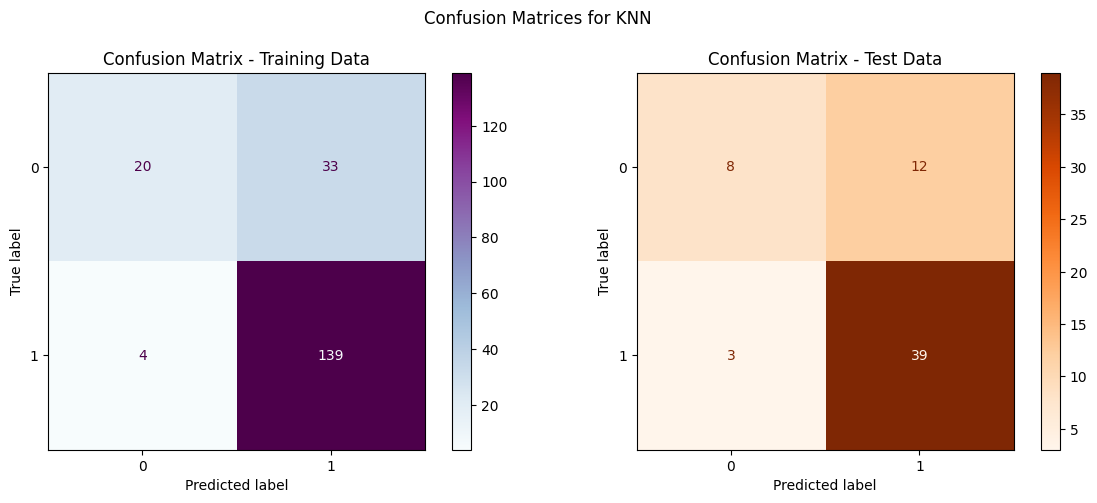

------------------------------------------------------------------------------------------------------------------------------------------------------


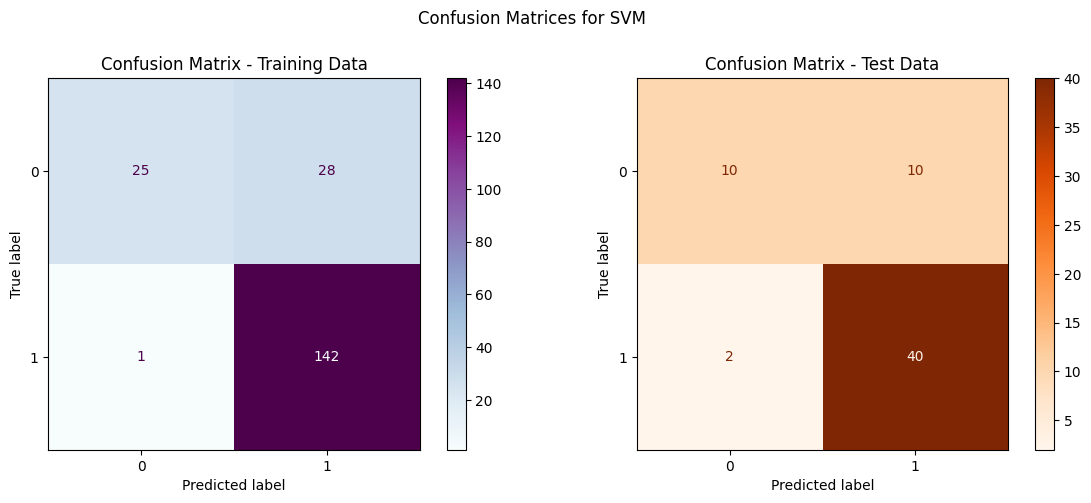

------------------------------------------------------------------------------------------------------------------------------------------------------


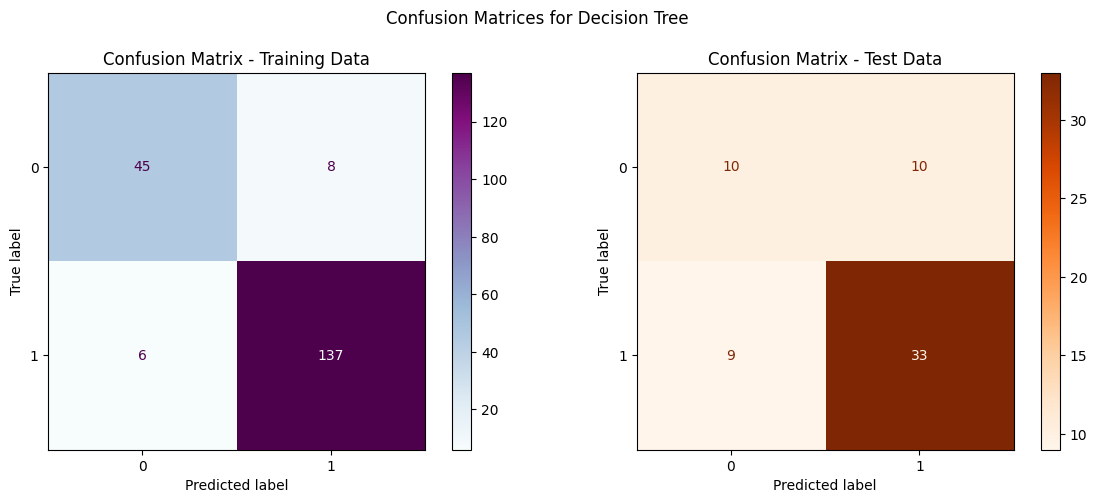

------------------------------------------------------------------------------------------------------------------------------------------------------


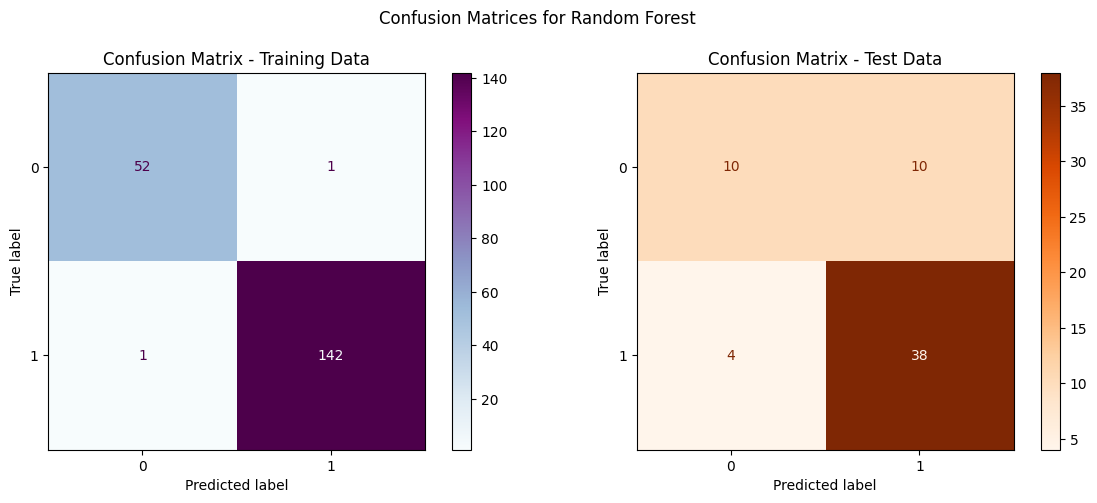

------------------------------------------------------------------------------------------------------------------------------------------------------


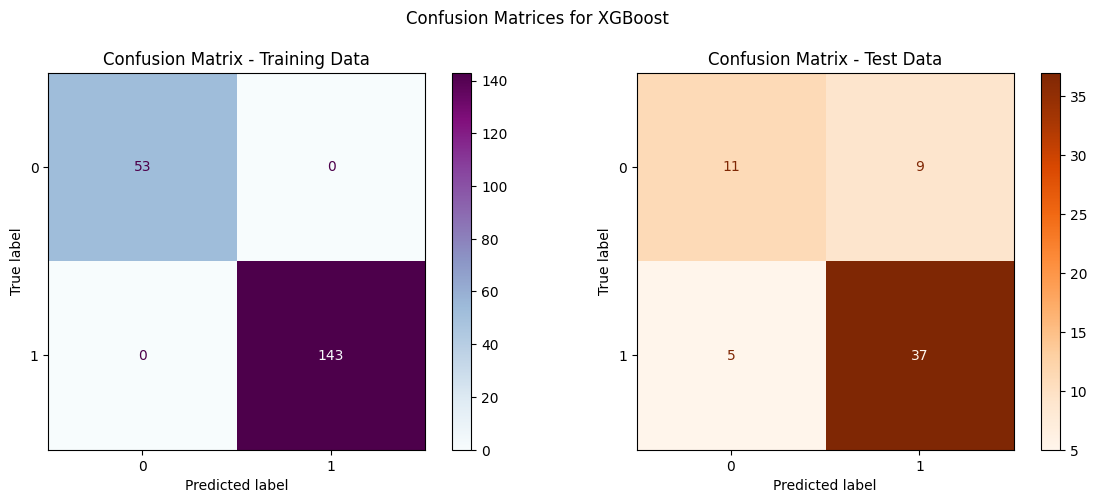

------------------------------------------------------------------------------------------------------------------------------------------------------


In [136]:
# List of pipelines
all_pipeline = [best_knn, best_svc, best_dt, best_rf, best_xgb]
pipeline_names = ["KNN", "SVM", "Decision Tree", "Random Forest", "XGBoost"]

for i, name in zip(all_pipeline, pipeline_names):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot confusion matrix for training data
    ConfusionMatrixDisplay.from_estimator(i, X_train, y_train, cmap='BuPu', ax=axes[0])
    axes[0].set_title('Confusion Matrix - Training Data')

    # Plot confusion matrix for test data
    ConfusionMatrixDisplay.from_estimator(i, X_test, y_test, cmap='Oranges', ax=axes[1])
    axes[1].set_title('Confusion Matrix - Test Data')

    # Set the title for the entire figure
    plt.suptitle(f'Confusion Matrices for {name}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
    plt.show()
    print("---" * 50)


Berdasarkan hasil perbandingan, saya tetap memilih **SVM sebagai model terbaik** dikarenakan model tergolong goodfit dengan hasil STD pada precision score terendah diantara yang lain.

## 8.3 Comparasion Between Original Dataset and Dataset with Hyperparameter Tuning

Komparasi dilakukan pada setiap model yang mana difokuskan untuk membandingkan hasil precision pada dataset original dan dataset dengan hyperparameter tuning.

In [153]:
# Menyimpan kedalam variabel hasil
knn_c = {
    'train - precision' : precision_score(y_train, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_knn.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_knn.std(),
    'train - precision - HT' : precision_score(y_train, y_pred_train_grid_knn),
    'test - precision - HT' : precision_score(y_test, y_pred_test_grid_knn),
    'precision score - Mean - Cross Validation - HT' : precision_train_cross_val_knn_hp.mean(),
    'precision score - Std - Cross Validation - HT' : precision_train_cross_val_knn_hp.std()
}

svc_c = {
    'train - precision' : precision_score(y_train, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_svc.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_svc.std(),
    'train - precision - HT' : precision_score(y_train, y_pred_train_grid_svc),
    'test - precision - HT' : precision_score(y_test, y_pred_test_grid_svc),
    'precision score - Mean - Cross Validation - HT' : precision_train_cross_val_svc_hp.mean(),
    'precision score - Std - Cross Validation - HT' : precision_train_cross_val_svc_hp.std()
}
dt_c = {
    'train - precision' : precision_score(y_train, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_dt.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_dt.std(),
    'train - precision - HT' : precision_score(y_train, y_pred_train_grid_dt),
    'test - precision - HT' : precision_score(y_test, y_pred_test_grid_dt),
    'precision score - Mean - Cross Validation - HT' : precision_train_cross_val_dt_hp.mean(),
    'precision score - Std - Cross Validation - HT' : precision_train_cross_val_dt_hp.std()
}
rf_c = {
    'train - precision' : precision_score(y_train, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_rf.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_rf.std(),
    'train - precision - HT' : precision_score(y_train, y_pred_train_grid_rf),
    'test - precision - HT' : precision_score(y_test, y_pred_test_grid_rf),
    'precision score - Mean - Cross Validation - HT' : precision_train_cross_val_rf_hp.mean(),
    'precision score - Std - Cross Validation - HT' : precision_train_cross_val_rf_hp.std()
}
xgb_c = {
    'train - precision' : precision_score(y_train, y_pred_train_xgb),
    'test - precision' : precision_score(y_test, y_pred_test_xgb),
    'precision score - Mean - Cross Validation' : precision_train_cross_val_xgb.mean(),
    'precision score - Std - Cross Validation' : precision_train_cross_val_xgb.std(),
    'train - precision - HT' : precision_score(y_train, y_pred_train_grid_xgb),
    'test - precision - HT' : precision_score(y_test, y_pred_test_grid_xgb),
    'precision score - Mean - Cross Validation - HT' : precision_train_cross_val_xgb_hp.mean(),
    'precision score - Std - Cross Validation - HT' : precision_train_cross_val_xgb_hp.std()

}

In [155]:
# Pembuatan variabel untuk menampung variabel hasil
all_model_c = {}

all_model_c["KNN"] = knn_c
all_model_c["SVM"] = svc_c
all_model_c["DecisionTree"] = dt_c
all_model_c["RandomForest"] = rf_c
all_model_c["XGBoost"] = xgb_c

# Di cetak dalam DataFrame
report_c = pd.DataFrame(all_model_c)
report_c

,KNN,SVM,DecisionTree,RandomForest,XGBoost
train - precision,0.837349,0.835294,1.000000,1.000000,1.000000
test - precision,0.722222,0.800000,0.739130,0.812500,0.800000
precision score - Mean - Cross Validation,0.781856,0.835591,0.862979,0.852974,0.855177
precision score - Std - Cross Validation,0.041740,0.019283,0.033056,0.028877,0.031230
train - precision - HT,0.808140,0.835294,0.944828,0.904459,1.000000
test - precision - HT,0.764706,0.800000,0.767442,0.791667,0.804348
precision score - Mean - Cross Validation - HT,0.801351,0.835591,0.871274,0.845984,0.859816
precision score - Std - Cross Validation - HT,0.030635,0.019283,0.028616,0.019981,0.025441


Berdasarkan tabel diatas diperoleh bahwa: 
1. KNN 
   - Selisih train dan test precission pada original dataset sebesar 11% sehingga tergolong overfit sedangkan setelah di hyperparameter tunning menjadi 5% sehingga tergolong goodfit. 
2. SVM
   - Selisih train dan test precission pada original dataset sebesar 3% sehingga tergolong goodfit sedangkan setelah di hyperparameter tunning menjadi 3% sehingga tergolong goodfit. 
3. Decision Tree
   - Selisih train dan test precission pada original dataset sebesar 27% sehingga tergolong overfit sedangkan setelah di hyperparameter tunning menjadi 17% sehingga masih tergolong overfit.
4. Random Foreset
   - Selisih train dan test precission pada original dataset sebesar 19% sehingga tergolong overfit sedangkan setelah di hyperparameter tunning menjadi 11% sehingga masih tergolong overfit.
5. XGBoost
   - Selisih train dan test precission pada original dataset sebesar 20% sehingga tergolong overfit sedangkan setelah di hyperparameter tunning menjadi 20% sehingga masih tergolong overfit.

Sesuai dengan hasil pada original dataset yang mana **saya memilih SVM sebagai best model**, ternyata dengan hyperparameter tuning hasilnya konsisten baik pada train, test, dan mean serta std berdasarkan cross validation. Model juga tergolong goodfi pada kedua hasil tersebut.

# 9. Model Saving

In [139]:
# Saving num_columns, cat_columns, dan best model terpilih

with open('list_num_cols.txt', 'wb') as file_1:
  pickle.dump(num_col, file_1)

with open('list_cat_cols_o.txt', 'wb') as file_2:
  pickle.dump(cat_col_o, file_2)

with open('list_cat_cols_n.txt', 'wb') as file_3:
  pickle.dump(cat_col_n, file_3)

# Save the best model
with open('best_model_svm.pkl', 'wb') as model_file:
  pickle.dump(best_svc, model_file)

Model saving berhasil dilakukan.

# 10. Model Inference

Model inference dilakukan di notebook berbeda berjudul `P1M2_shinta_inf.ipynb`


# 11.  Summary

## 11.1 Conceptual Problems

Daftar pertanyaan

**A. Jelaskan latar belakang adanya bagging dan cara kerja bagging !**
- Bagging atau agregasi bootstrap merupakan metode pembelajaran ensemble yang umum digunakan untuk mengurangi varians dalam set data yang bising. Latar belakangnya yaitu 
karena terdapat model yang tergolong overfitting atau varians tinggi maka munculah ide yang mana menyatakan bahwa dengan menggabungkan banyak model sehingga bisa mengurangi varians dan meningkatkan stabilitas model. Menurut Leo Braim (1996), terdapat 3 langkah dasar cara kerja bagging yaitu:
    - Bootstrapping = Bagging memanfaatkan teknik pengambilan sampel bootstrapping untuk membuat sampel yang beragam. Metode resampling ini menghasilkan subset yang berbeda dari set data pelatihan. Hal ini dilakukan dengan memilih titik data secara acak dan dengan penggantian. Ini berarti bahwa setiap kali Anda memilih titik data dari set data pelatihan, Anda dapat memilih contoh yang sama beberapa kali. Hasilnya, nilai atau contoh diulang dua kali (atau lebih) dalam sampel.
    - Pelatihan paralel = Sampel bootstrap ini kemudian dilatih secara independen dan paralel satu sama lain menggunakan pembelajar yang lemah atau dasar.
    - Agregasi = Akhirnya, tergantung pada tugasnya (yaitu, regresi atau klasifikasi), rata-rata atau mayoritas prediksi diambil untuk menghitung estimasi yang lebih akurat. Dalam kasus regresi, rata-rata diambil dari semua keluaran yang diprediksi oleh masing-masing pengklasifikasi; ini dikenal sebagai pemungutan suara lunak. Untuk masalah klasifikasi, kelas dengan mayoritas suara tertinggi diterima; ini dikenal sebagai pemungutan suara keras atau pemungutan suara mayoritas.

**B.Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !**
| **Fitur**   | **Random Forest**   | **XGBoosting** |
|------------------------|--------------------------|--------------------------|
| **Metode Ensemble** | Bagging | Boosting |
| **Pembentukan Pohon** | Paralel, sampel data dan fitur acak | Berurutan, fokus pada kesalahan pohon sebelumnya |
| **Optimasi** | Tidak ada optimasi khusus pada setiap pohon | Menggunakan fungsi kerugian untuk mengoptimalkan setiap pohon |
| **Kompleksitas** | Relatif sederhana | Lebih kompleks |
| **Kinerja** | Baik, terutama untuk data dengan banyak fitur | Seringkali lebih baik, terutama untuk dataset besar dan kompleks |

**C. Jelaskan apa yang dimaksud dengan Cross Validation !**
- Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. Selanjutnya pemilihan jenis CV dapat didasarkan pada ukuran dataset. Biasanya CV K-fold digunakan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.


## 11.2 Based on EDA

Berdasarkan EDA diperoleh bahwa: 
1. **Loan_Status "Y" atau di approved lebih banyak sebesar 71.10% daripada "N" atau tidak di approved sebesar 28.90%**. Detail jumlahnya yaitu Y sebanyak 219 dan N sebanyak 89.
2. **Loan banyak diajukan oleh Male (Laki-laki) dibandingkan Female (Perempuan)**. Kedua jenis kelamin tersebut juga menyatakan loan_status di approved (1) lebih banyak daripada tidak diapproved (0).
3. **Loan banyak diajukan di area Semi Urban, diikuti dengan Urban dan Rural**. Pada ketiga area tersebut menunjukkan bahwa loan_status lebih banyak di approved (1) daripada tidak di approved (0).
4. **Loan banyak diajukan oleh pengaju dengan edukasi Graduate (sudah lulus)**. Pada kedua edukasi yaitu Graduate dan Not Graduate menunjukkan bahwa loan_status lebih banyak di approved (1) daripada tidak di approved (0).
5. **Nilai minimum dari Applicant Income sebesar 150 ribu US Dollar, maksimumnya sebesar 9730 ribu US Dollar dengan rata-rata sebesar 3599.13 ribu US Dollar**. Selisih nilai minimum dan maksimum dari applicant income yang diapproved dengan tidak di approved cukup jauh, namun rata-rata dari kedua nya tidak berbeda secara signifikan.
6. **Nilai minimum dari Loan Amount sebesar 9 ribu US Dollar, maksimumnya sebesar 150 ribu US Dollar dengan rata-rata sebesar 104.623 ribu US Dollar**. Selisih nilai minimum dari loan amoount yang diapproved dengan tidak di approved cukup jauh. Namun nilai maksimum keduanya justru sama dan nilai rata-ratanya tidak berbeda secara signifikan
7. **Nilai minimum dari Loan Amount Term sebesar 36 bulan (3 tahun), maksimumnya sebesar 480 bulan (40 tahun) dengan rata-rata sebesar 341 tahun (+- 28 tahun)**. Selisih nilai minimum dari loan amoount term yang diapproved dengan tidak di approved cukup jauh. Namun nilai maksimum keduanya justru sama dan nilai rata-ratanya tidak berbeda secara signifikan.

## 11.3 Based on Model Evaluation

Evaluasi model dilakukan pada data set yaitu loan_ata.csv untuk memprediksi loan status apakah di approved atau tidak. Matriks evaluasi utama yaitu **precission** guna **meminimalisir False Positive (FP)** yang mana loan tidak di approved tapi di prediksi di approved. Hal tersebut dikarenakan akan menimbulkan kerugian bagi perusahaan yang mana akan memberikan loan atau pinjaman ke pengaju yang mempunyai potensi tidak mampu membayar. 

Dari ke-5 model yang diuji (KNN,SVM, Desicion Tree, Random Forest, dan XGBoost) model terbaik yang dipilih yaitu **SVM**. Model tersebut dipilih karena sebelum dilakukan hyperparameter tunning, precision yang dihasilkan pada train dan test memiliki selisih 2% < 5% sehingga tergolong **goodfit** (model lainnya overfit) dan hasil **STD cross validation paling rendah** diantara model lain. Hasil hyperparameter tunning pada svm mirip dengan tanpa dilakukan hyperparameter tunning, dengan detail sebagai berikut:
- Precision - Train set tanpa Tuning = 0.835294 sedangkan Precision - Train set dengan Tuning = 0.835294, nilai yang dihasilkan sama.
- Precision - Test set tanpa Tuning = 0.800000 sedangkan Precision - Test set dengan Tuning = 0.800000, nilai yang dihasilkan sama.
- False Positives pada Train set tanpa tuning dan dengan tuning sebesar 28  yang menunjukkan bahwa terdapat 28 kasus negatif diklasifikasikan secara salah sebagai positif. 
- False Positives pada Test set tanpa tuning dan dengan tuning sebesar 10  yang menunjukkan bahwa terdapat 10 kasus negatif diklasifikasikan secara salah sebagai positif.

Kemiripan tersebut kemungkinan diakibatkan dari nilai hyperparameter awal yang digunakan sudah cukup dekat dengan nilai optimal sehingga proses tuning mungkin tidak menghasilkan peningkatan yang signifikan.

## 11.4 Business Insight

- Model SVM yang telah teruji dapat segera diimplementasikan ke dalam sistem persetujuan peminjaman perusahaan untuk mendukung proses pengambilan keputusan.
- Perusahaan perlu menawarkan berbagai produk pinjaman dengan jumlah dan jangka waktu yang fleksibel untuk memenuhi kebutuhan nasabah yang beragam.
- Selain pendapatan, perusahaan perlu mempertimbangkan faktor-faktor lain seperti stabilitas pekerjaan, sejarah kredit, dan jumlah aset dalam proses penilaian kredit.

## 11.6 Conclusion

Guna memperoleh hasil prediksi yang optimal pada loan status yaitu di approved atau tidak, model SVM adalah model terbaik untuk digunakan. Hal tersebut ditinjau dari precision score yang dihasilkan sebesar 83% pada train dan 81% pada test dengan selisih 3% < 5% yang menyatakan bahwa model yang dihasilkan tergolong goodfit. Dengan demikia, model SVM yang telah teruji dapat segera diimplementasikan ke dalam sistem persetujuan peminjaman perusahaan untuk mendukung proses pengambilan keputusan.